## Investigation On Intervals and Determine whether it's meal

In [1]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import intervals as invs

import paths
from preprocessing import read_csv_clean

path = '../behavior data integrated/Adjusted FED3 Data.xlsx'
# path = './behavior data integrated/Adjusted FED3 Data.xlsx'

In [3]:
paths.fr1_cask_csvs

['/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B10M1.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B10M2.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B10M3.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B10M4.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B10M5.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B6M1.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B6M2.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B6M3.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B6M4.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B8M1.CSV',
 '/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/FR1/cask/B8M2.

## Control Group

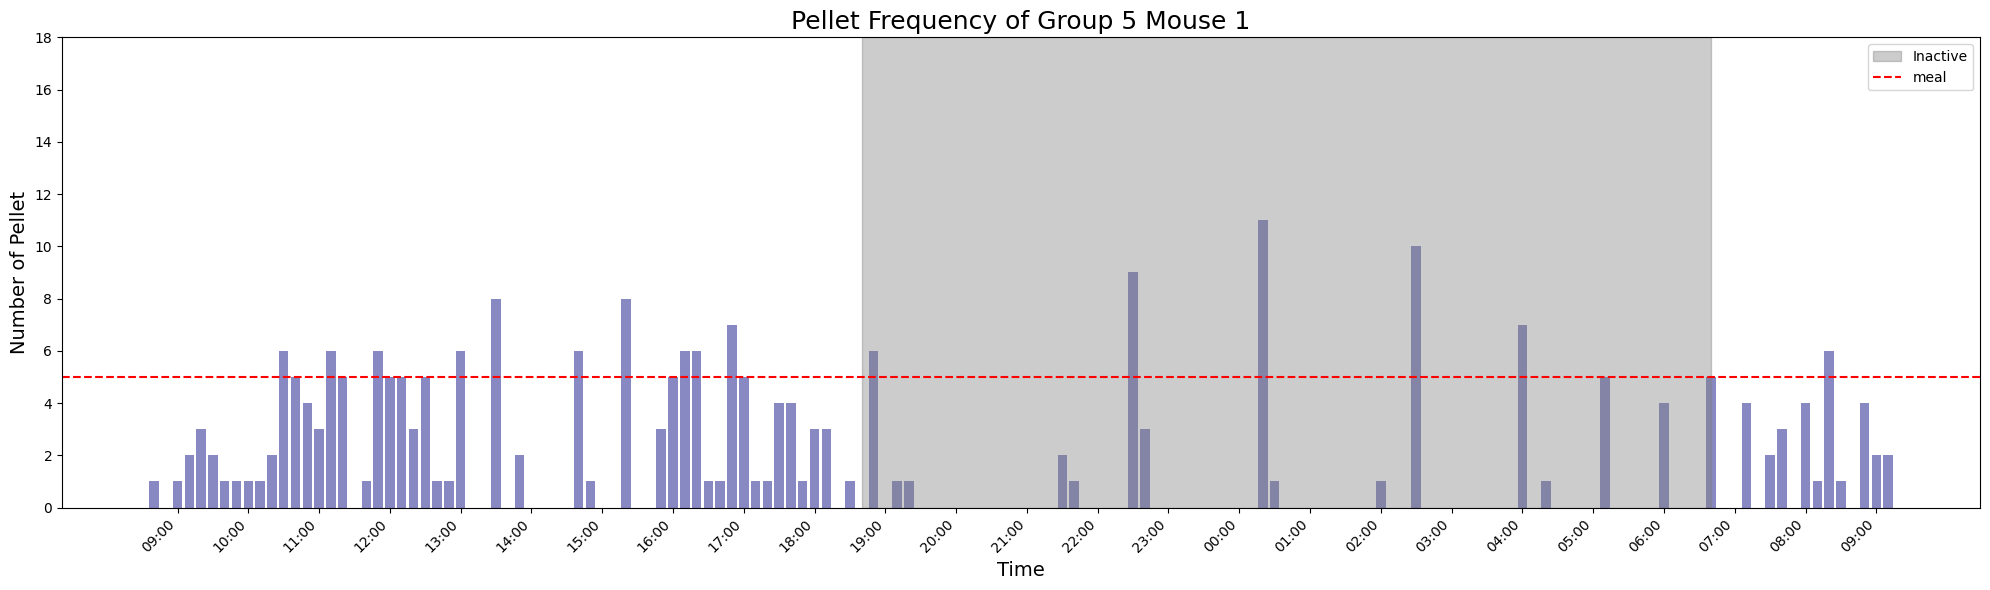

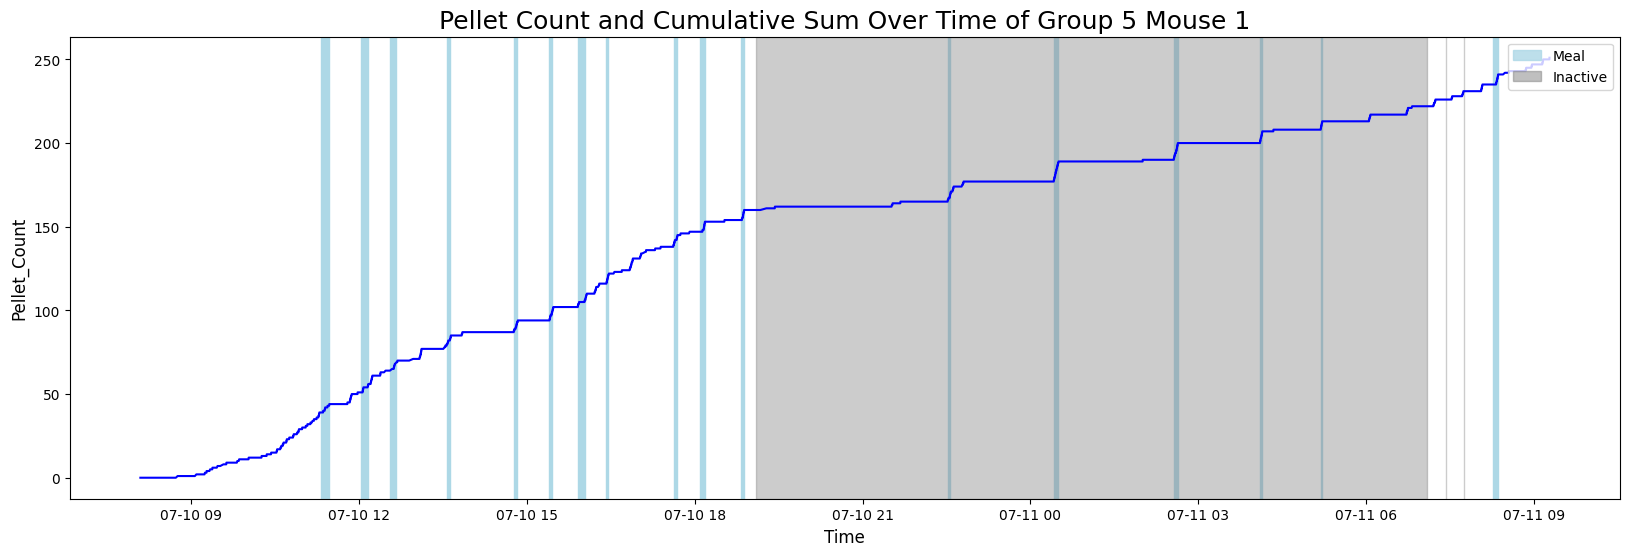

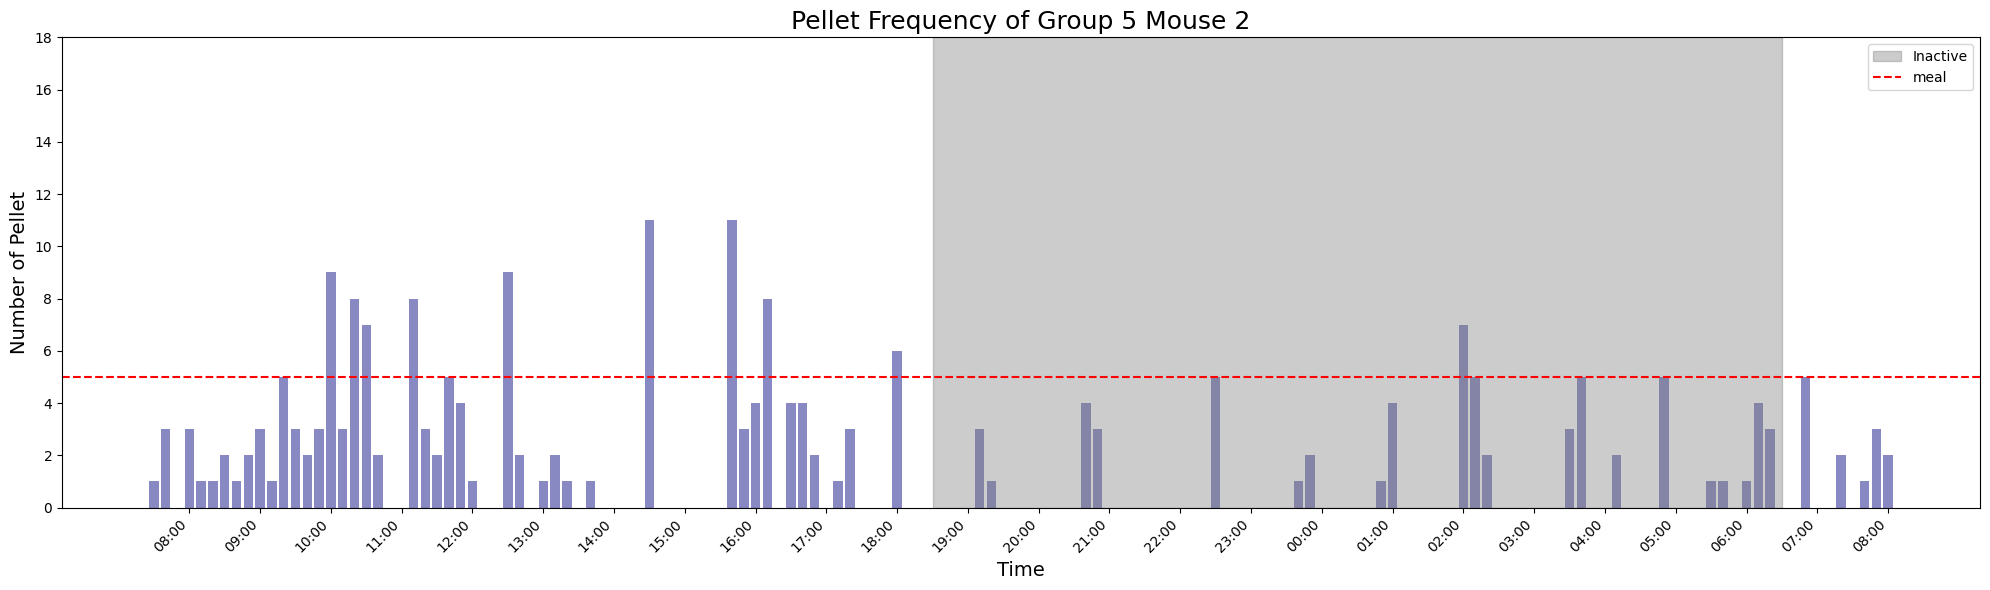

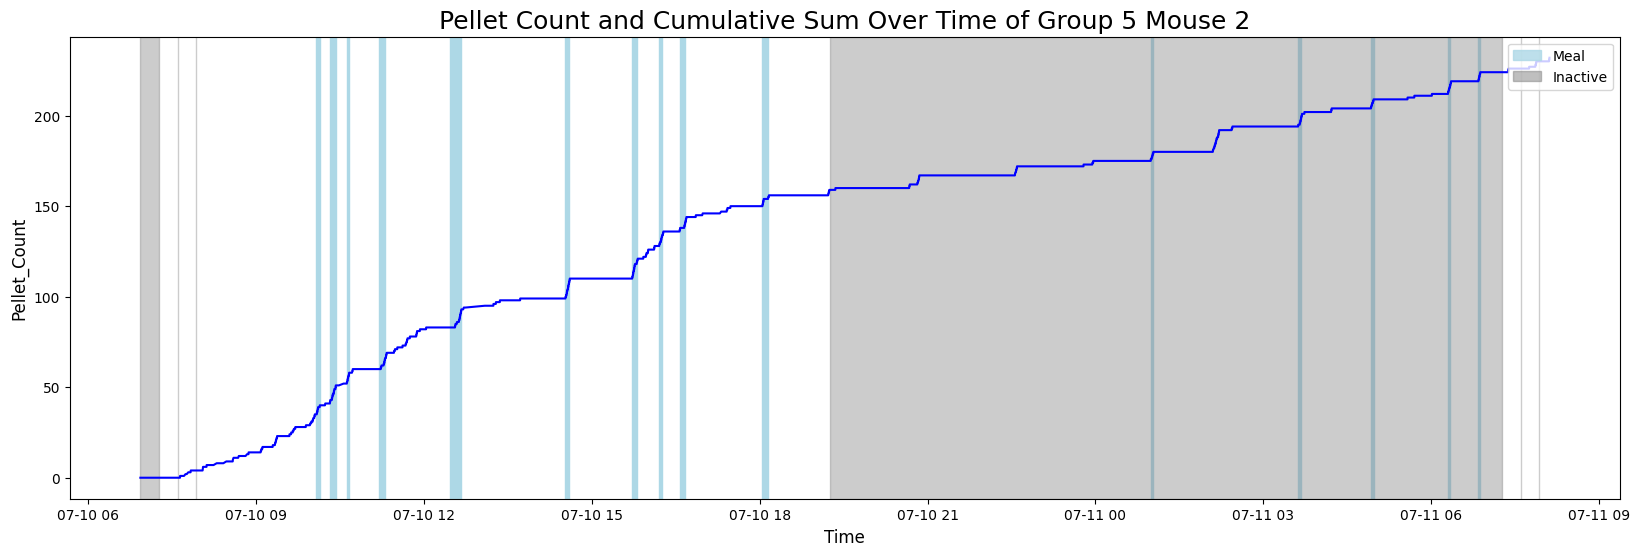

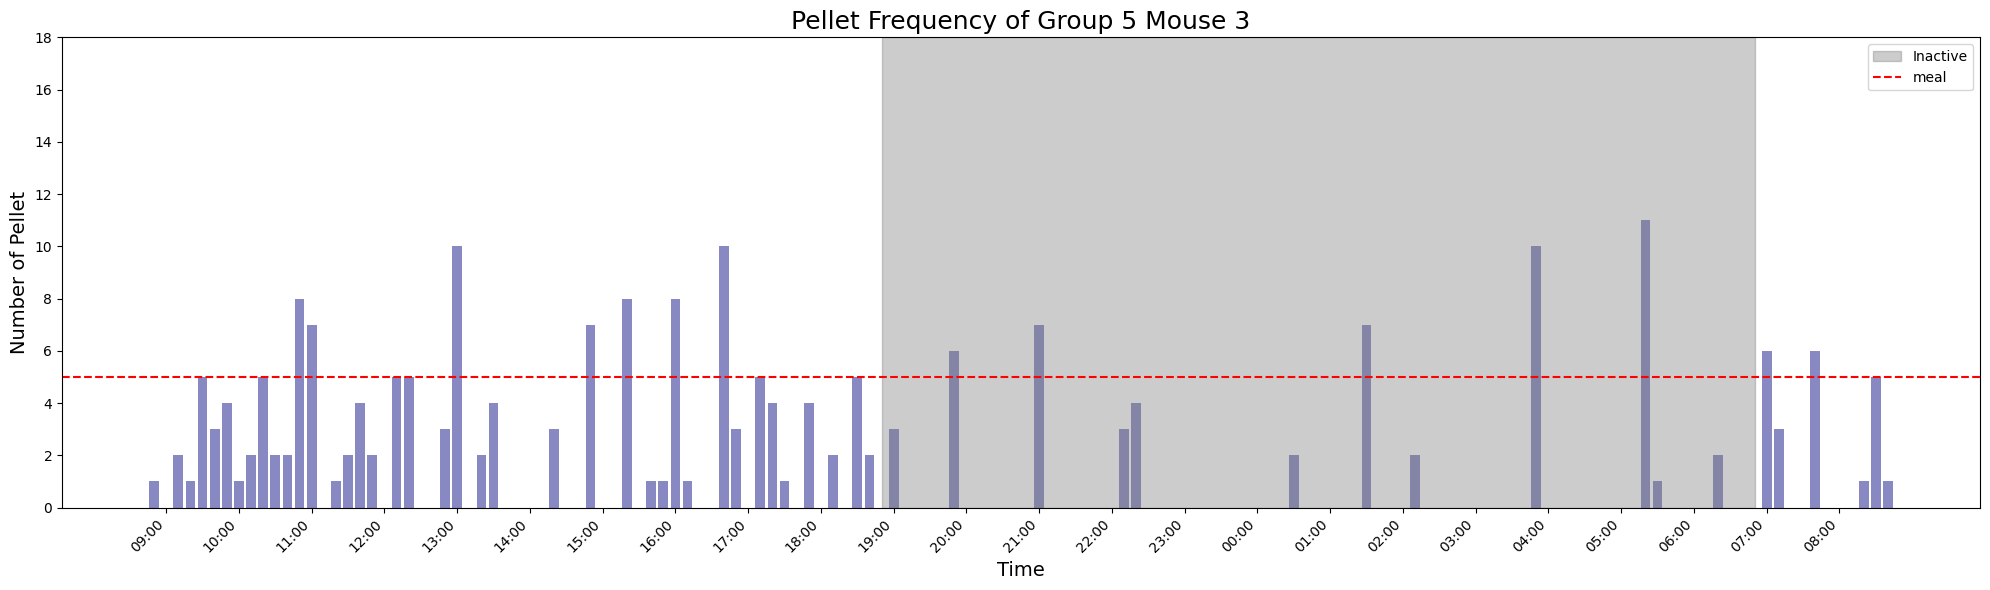

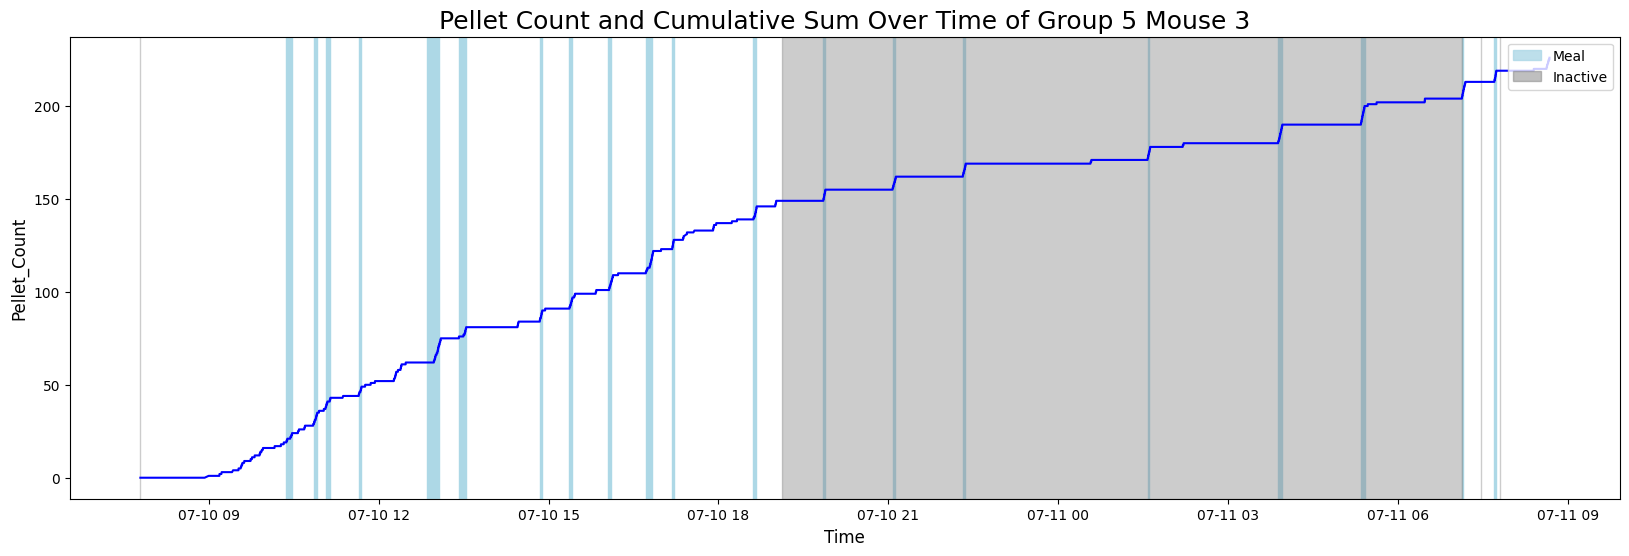

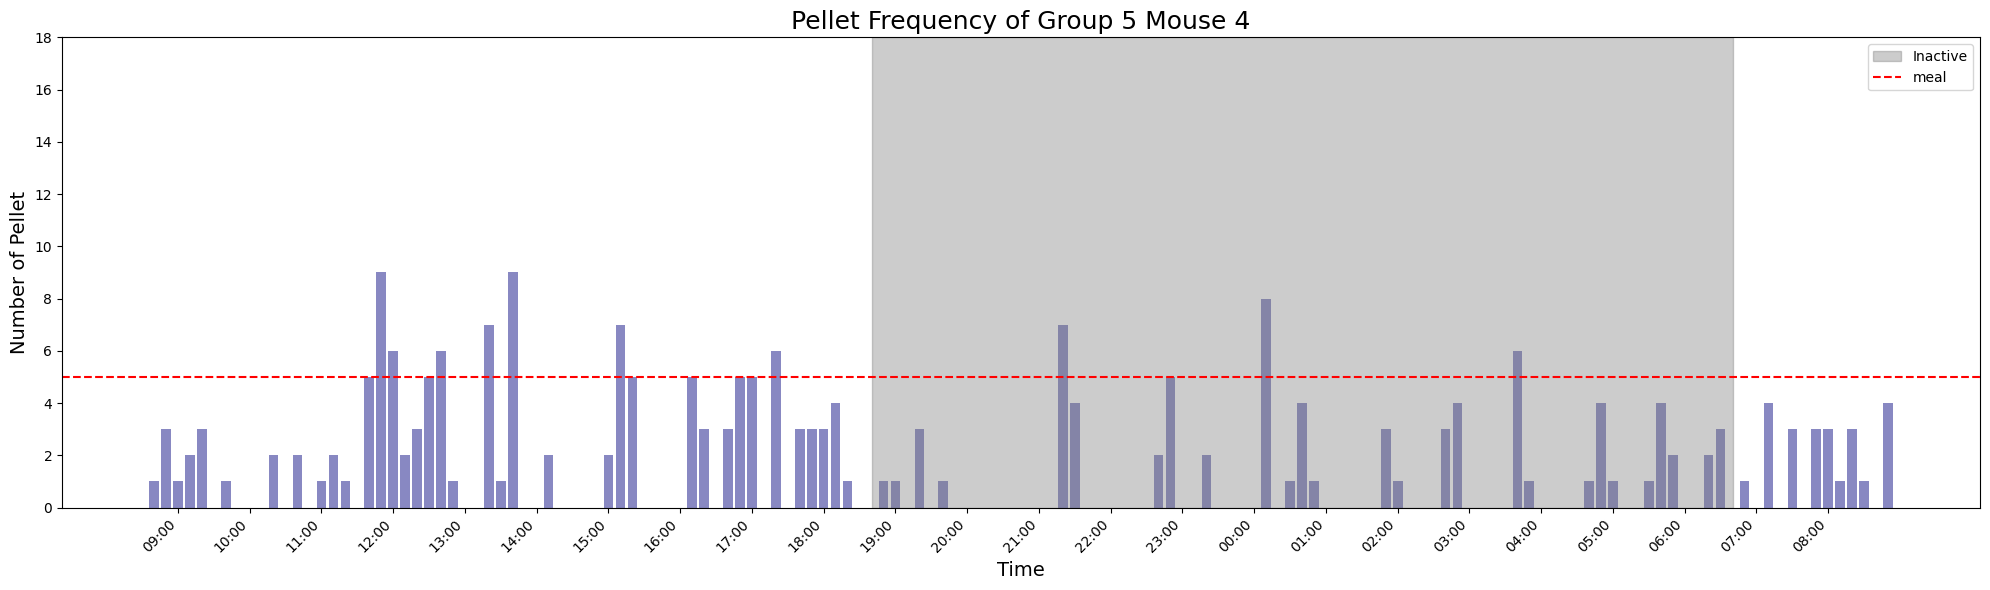

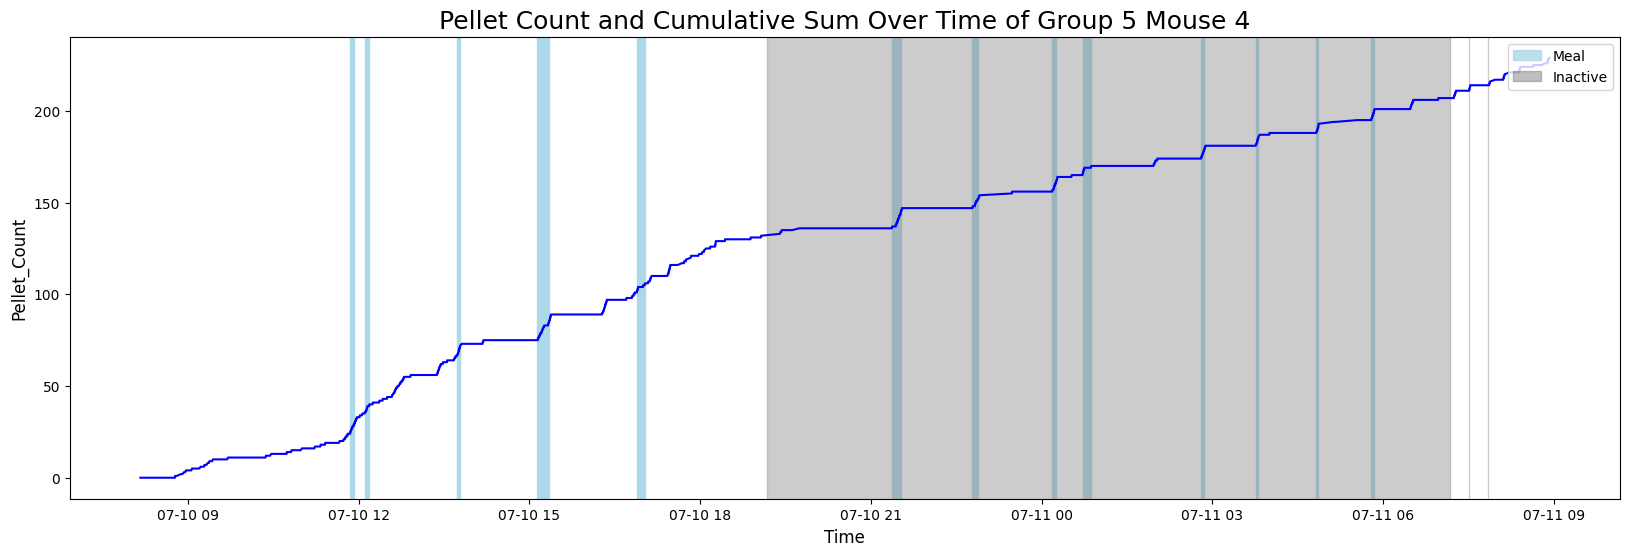

In [4]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
flip_ctrl_meal_count = []

for path in paths.fr1_ctrl_csvs:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    meal = ml.find_meals(data)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    flip_ctrl_meal_count.append(avg)
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

## CASK Group

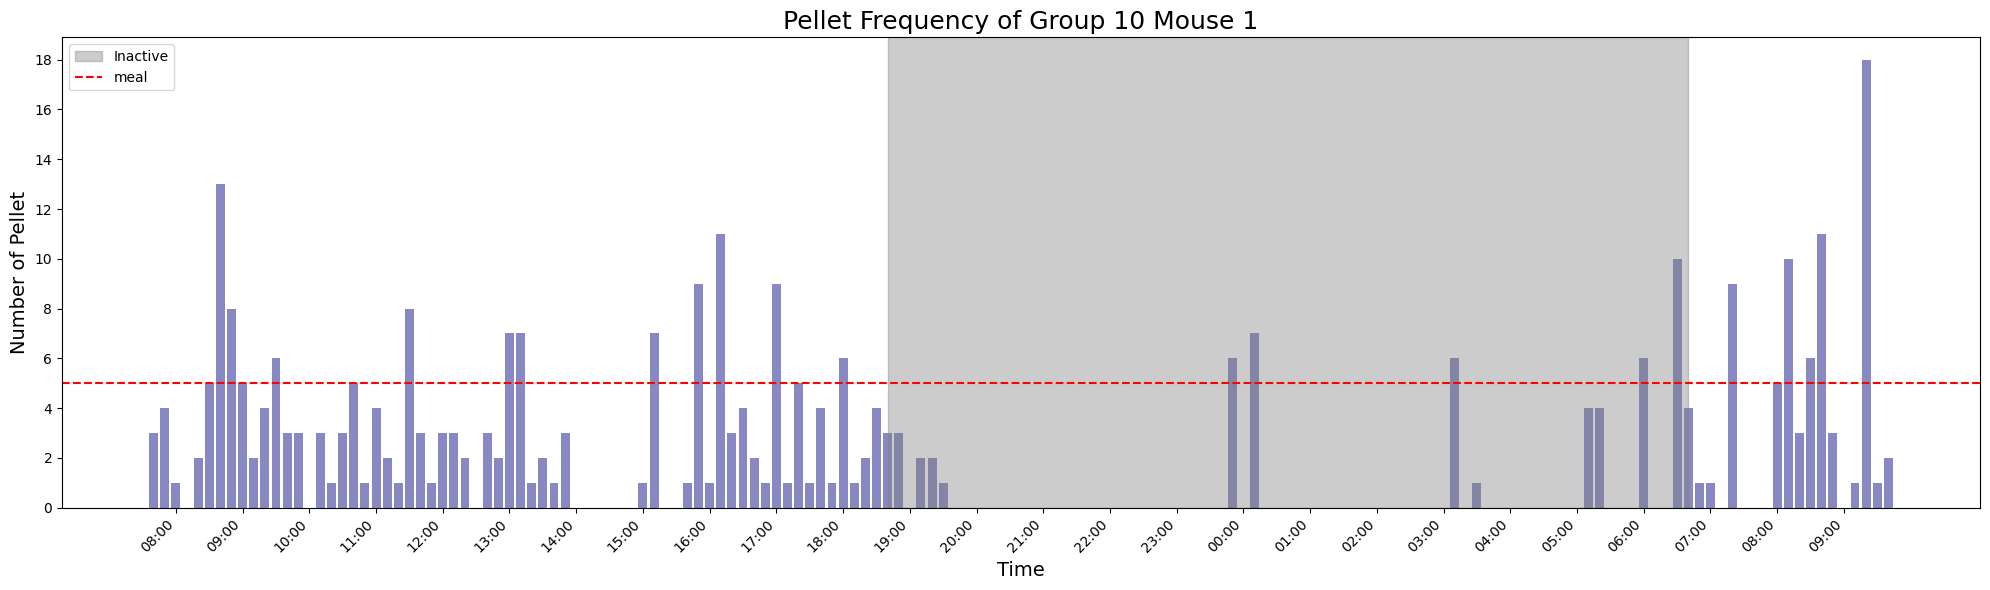

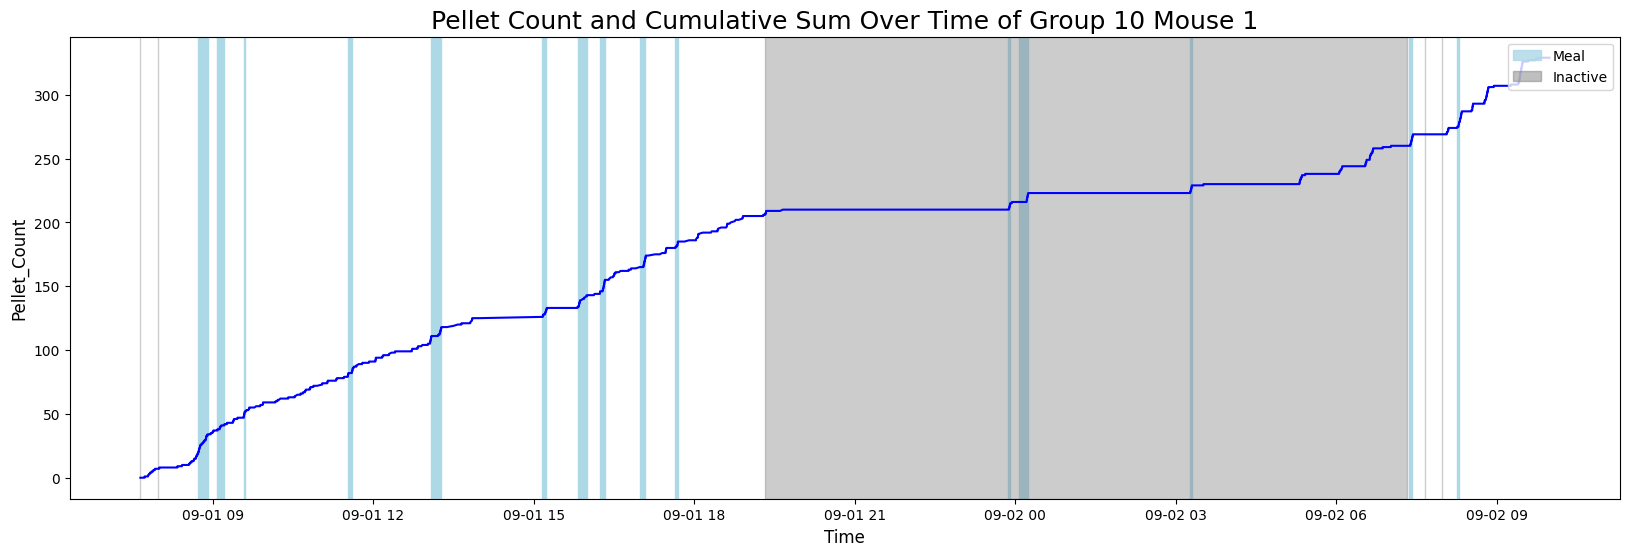

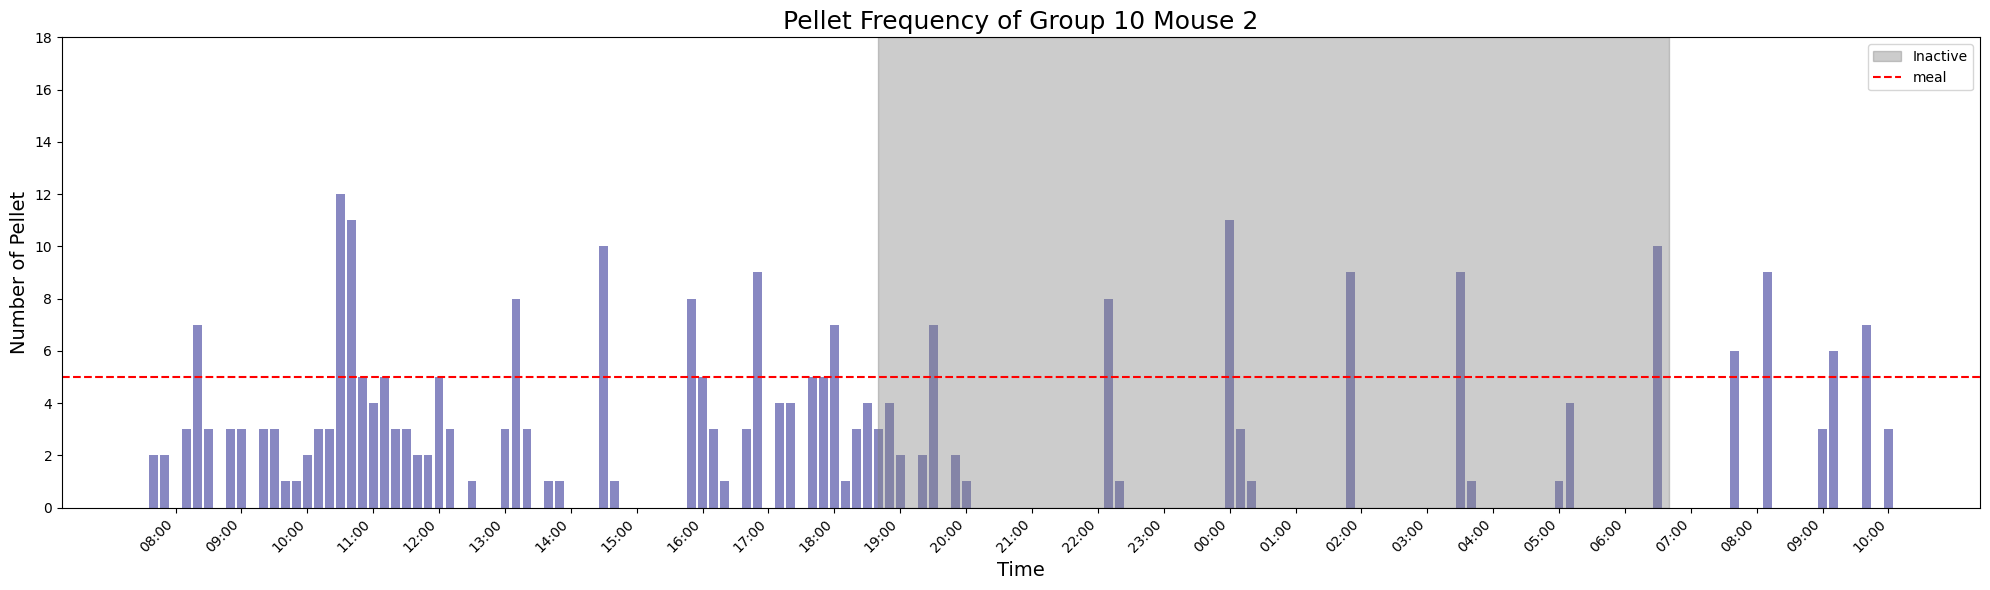

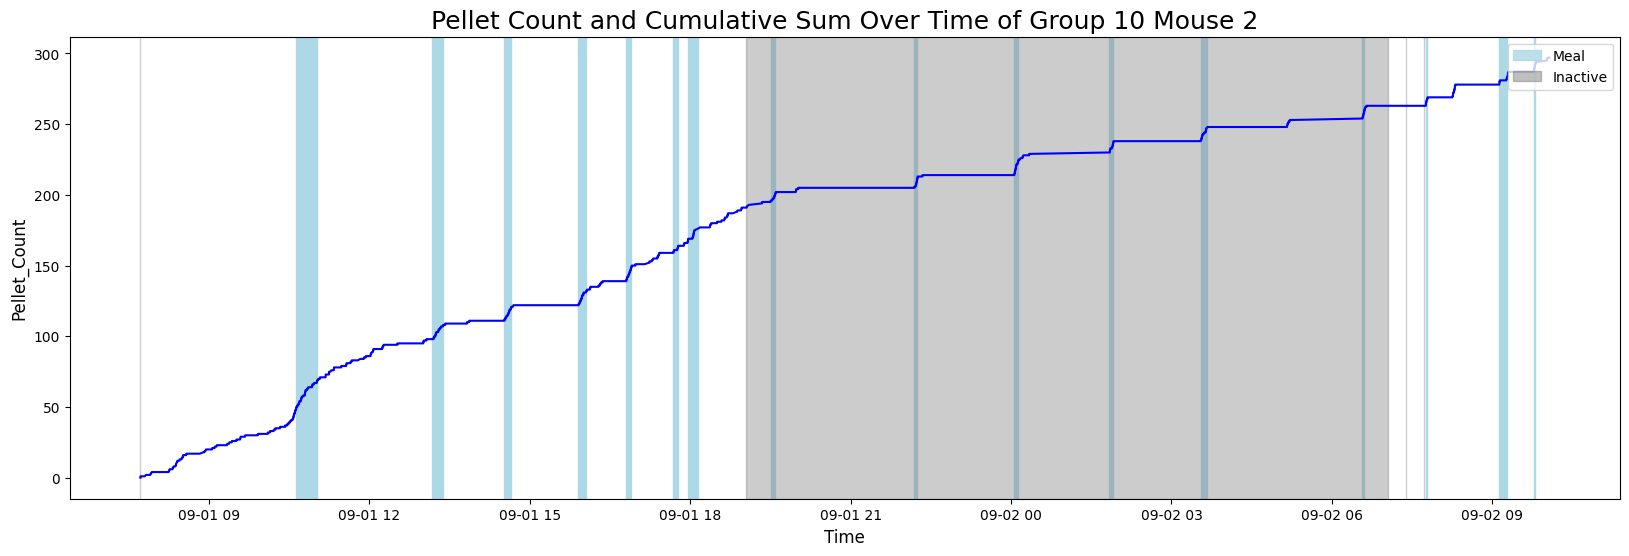

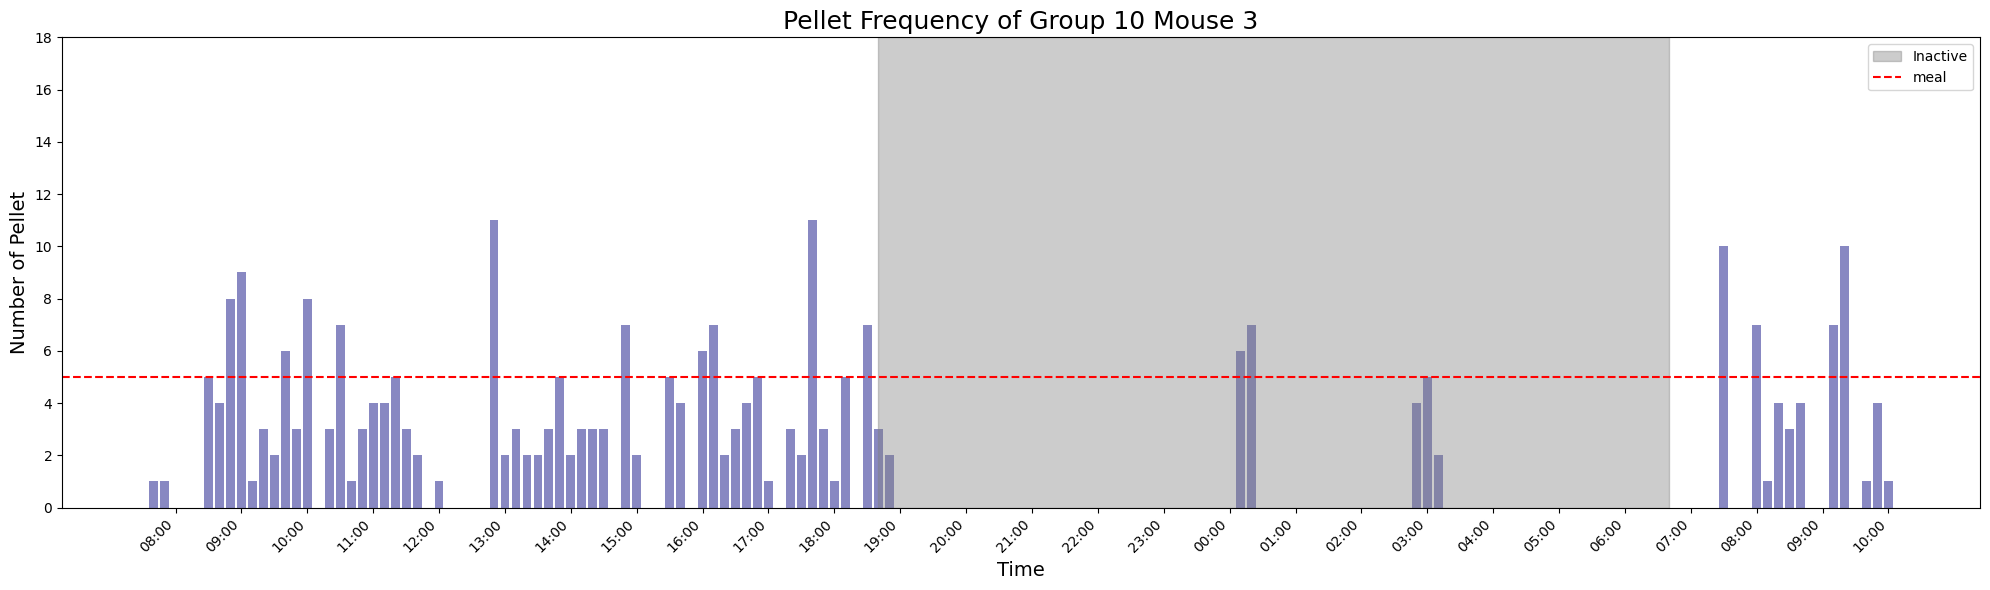

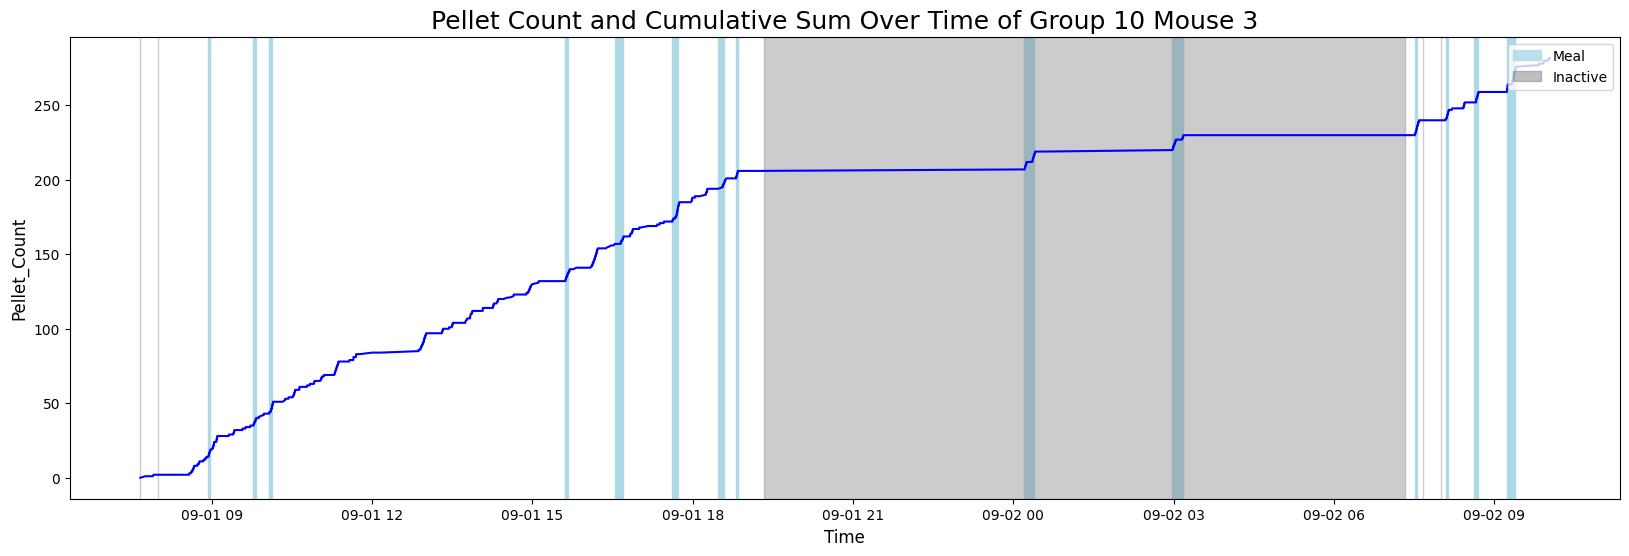

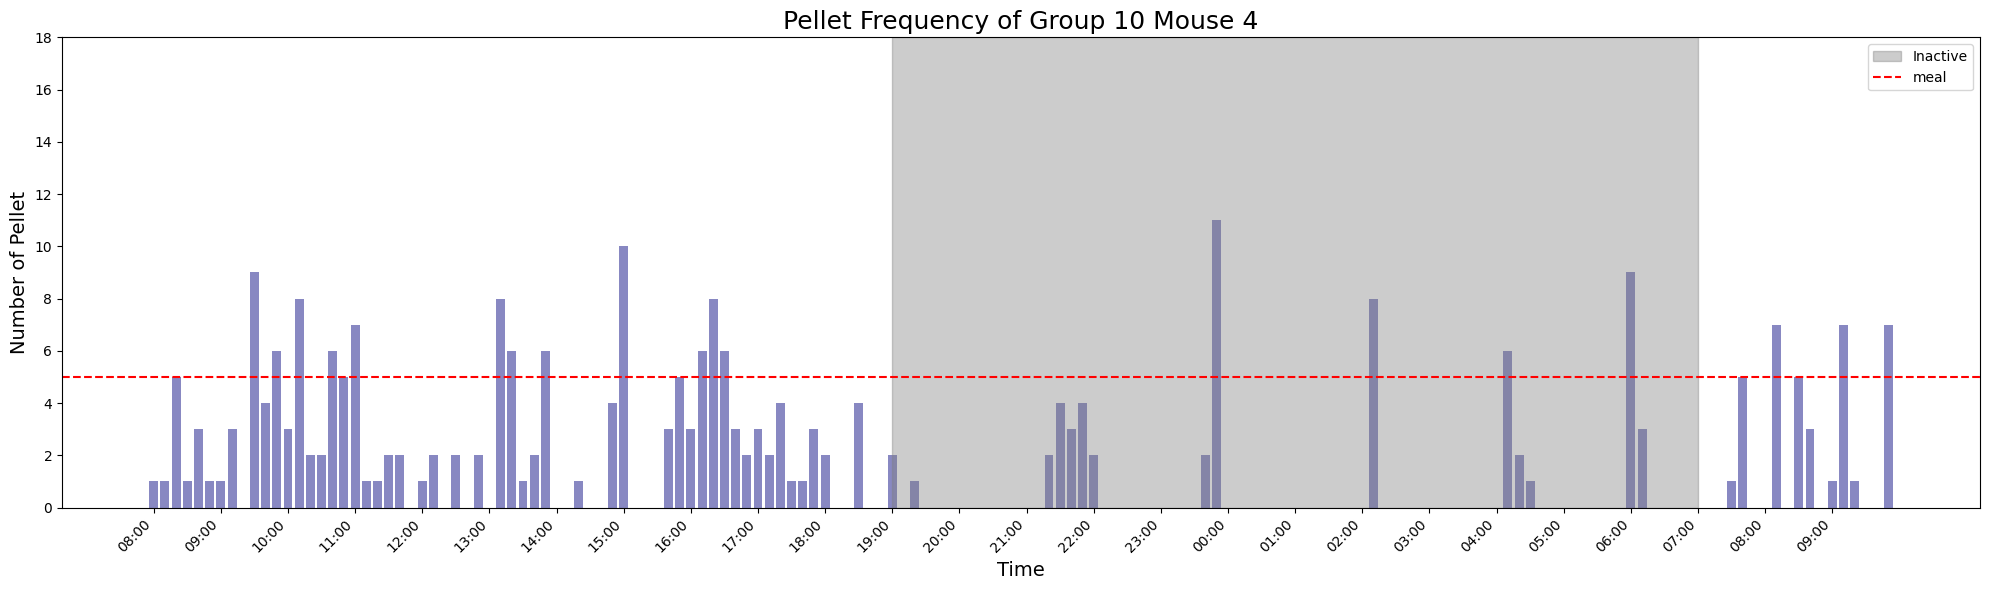

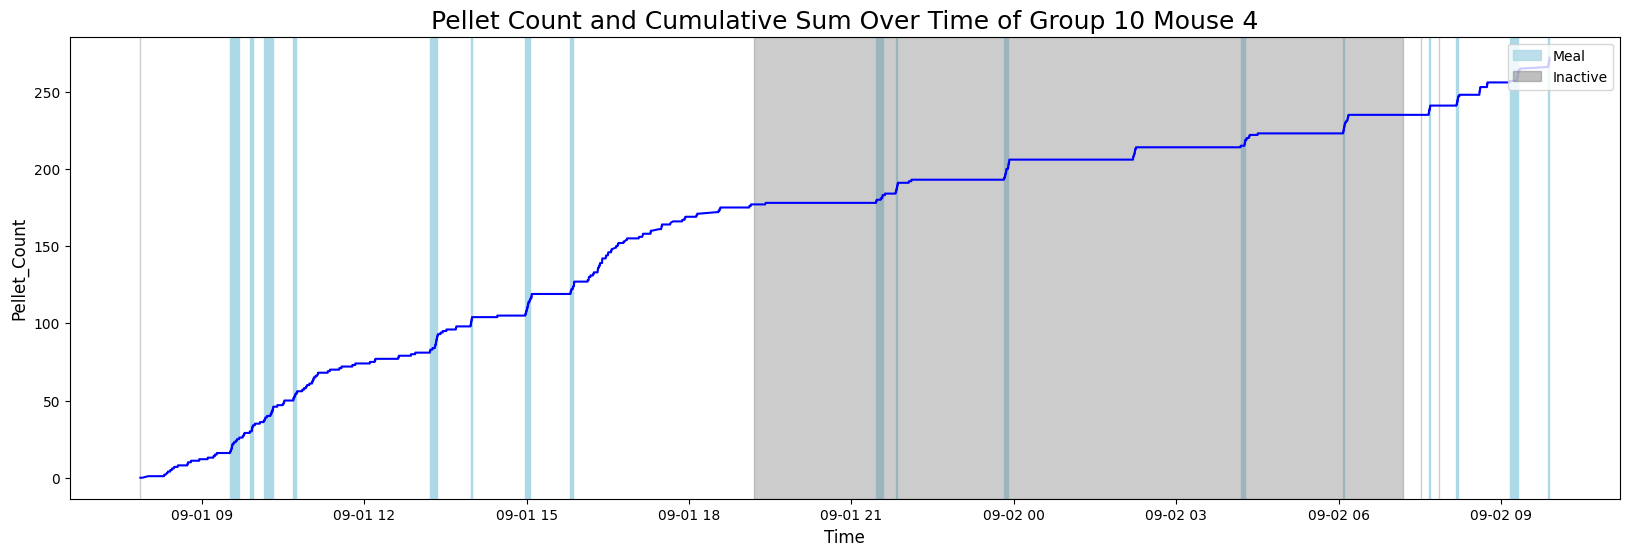

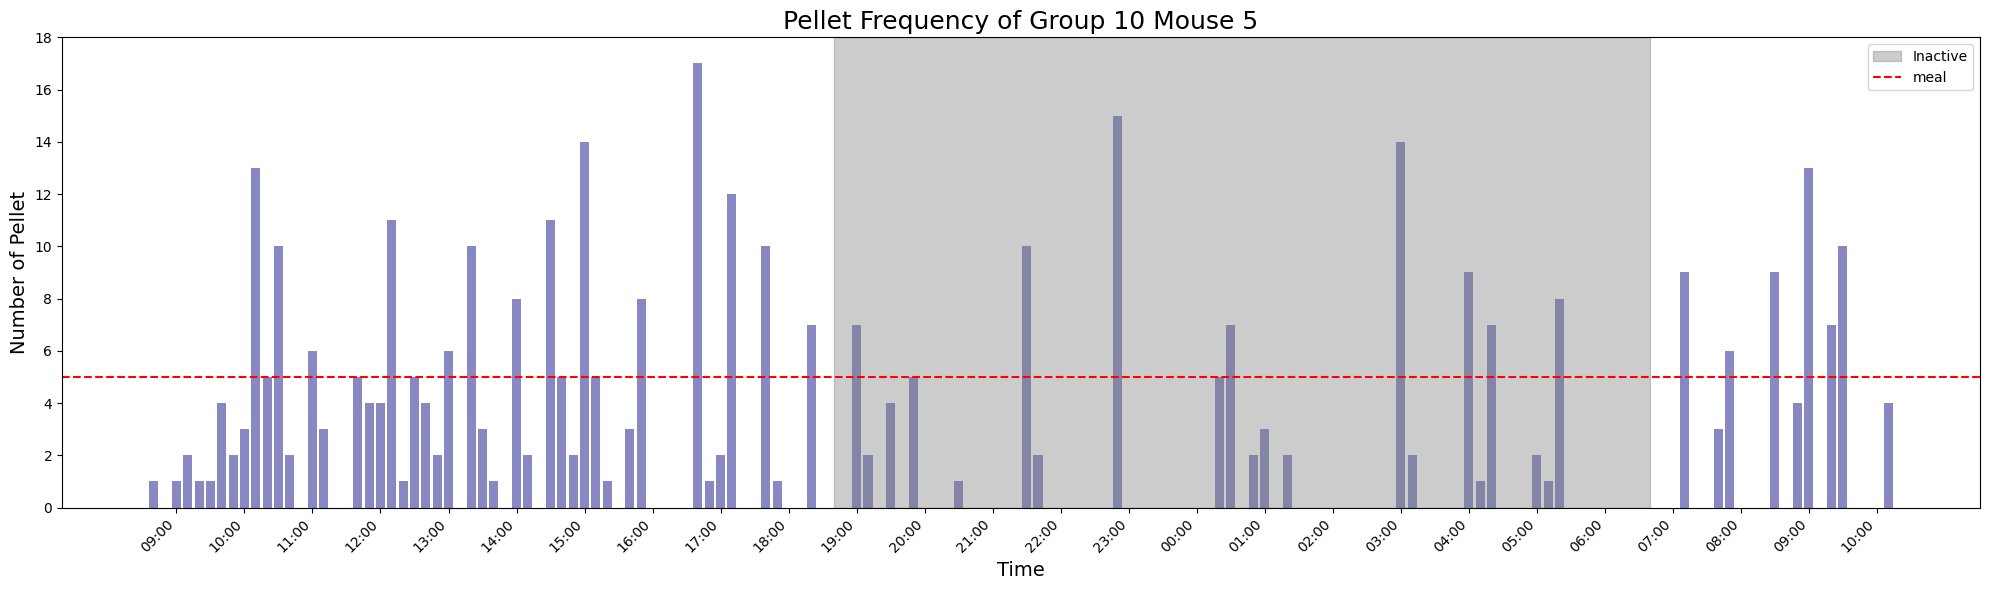

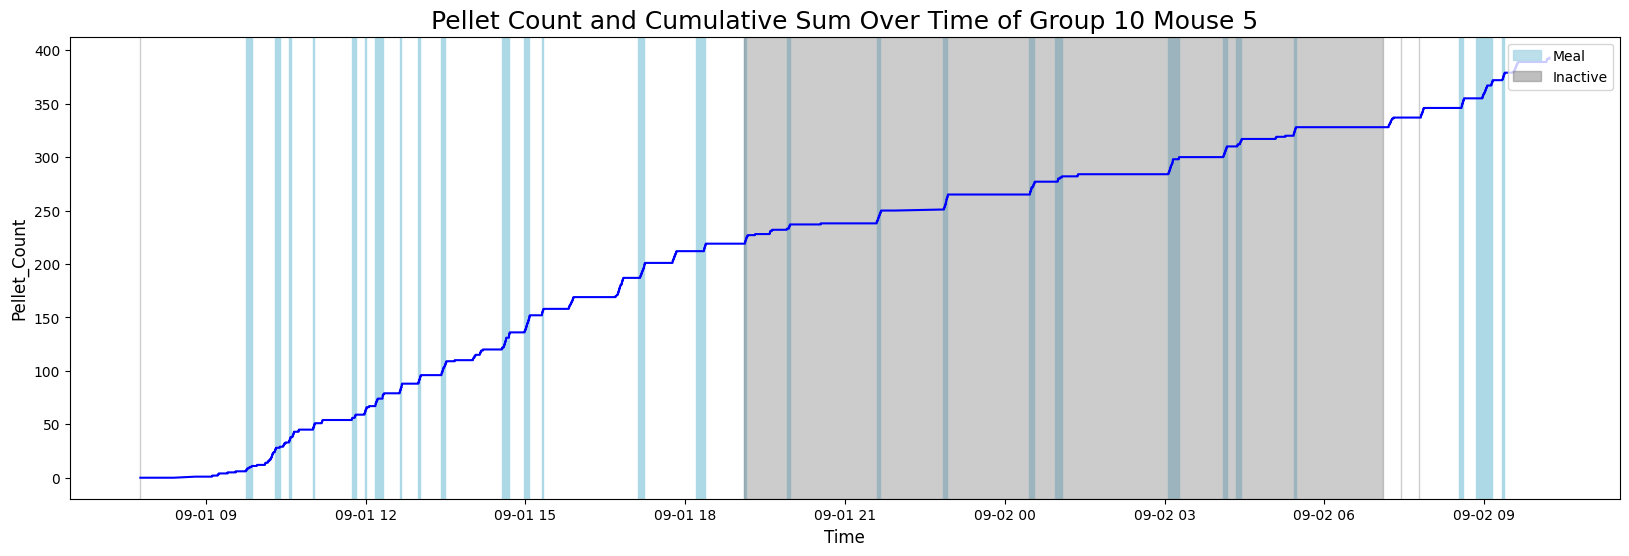

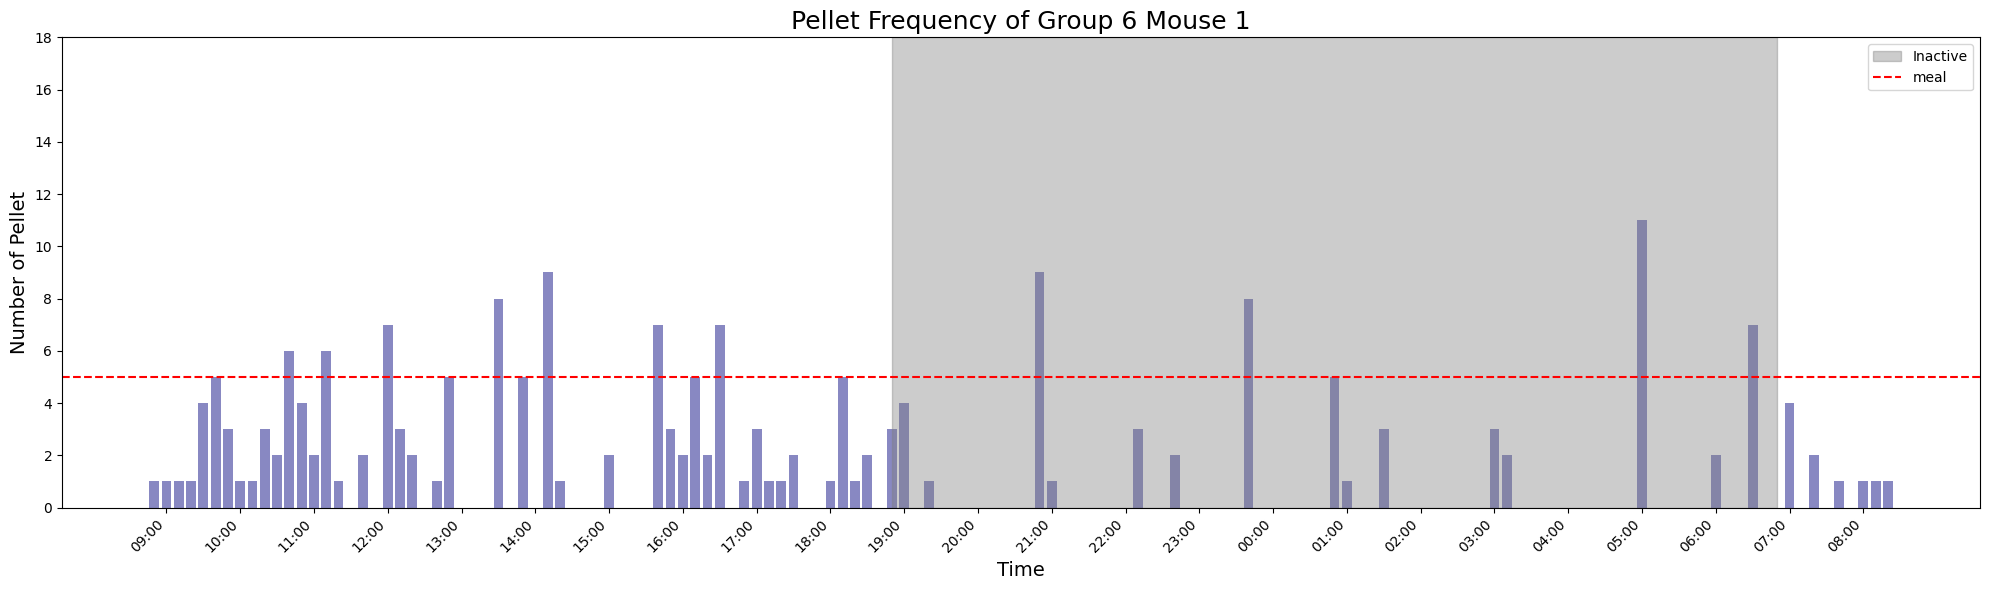

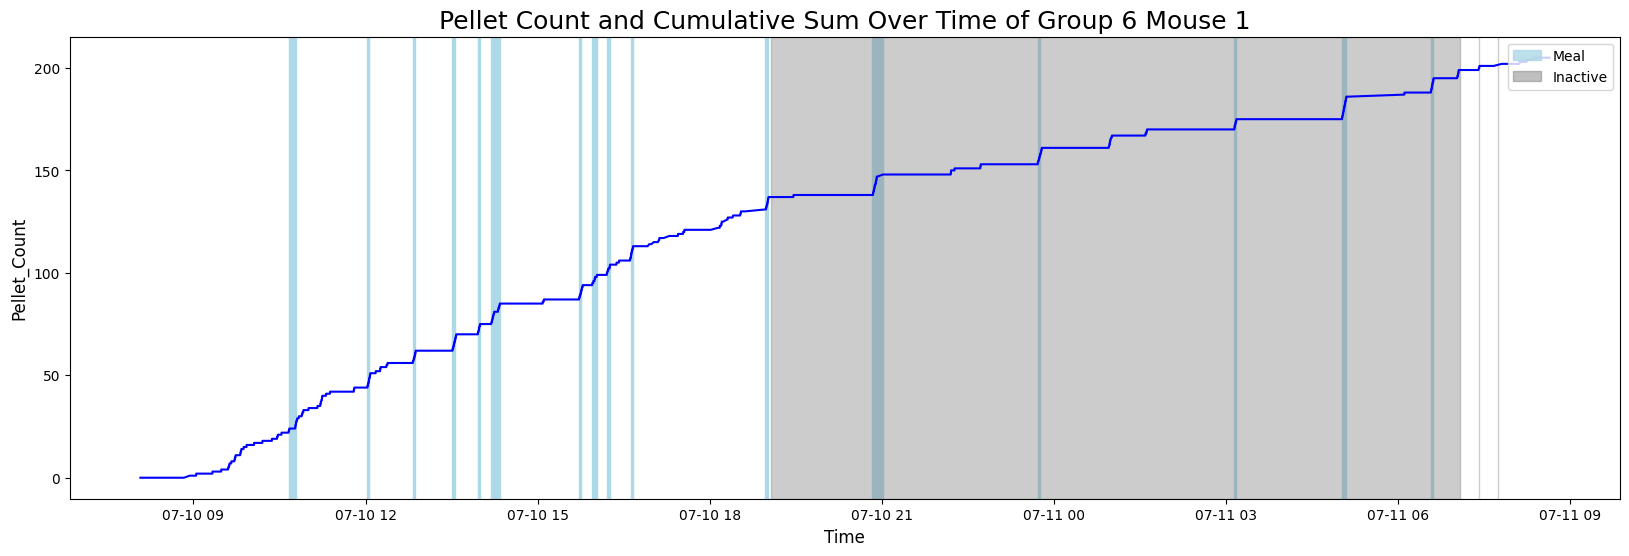

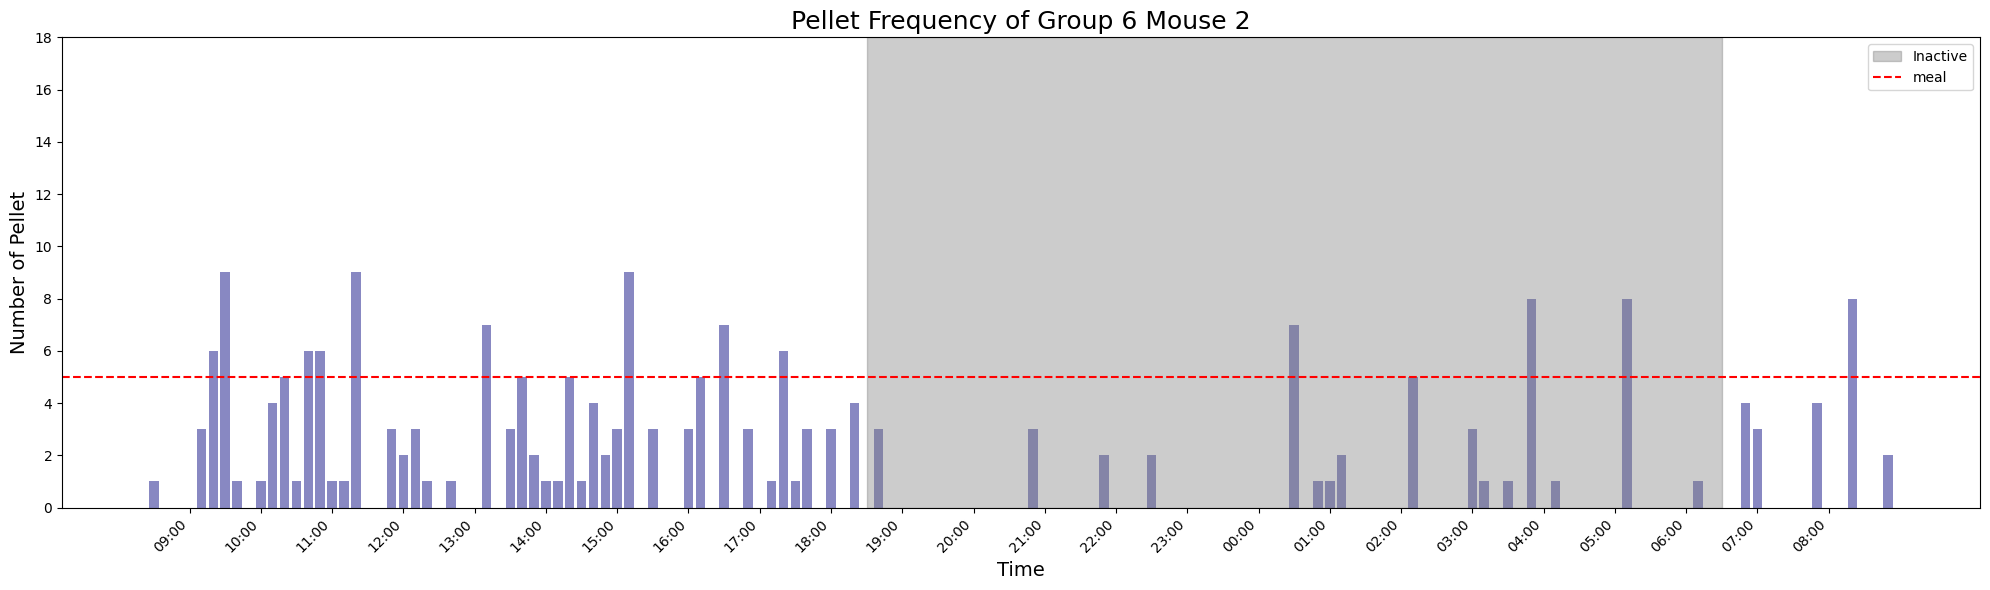

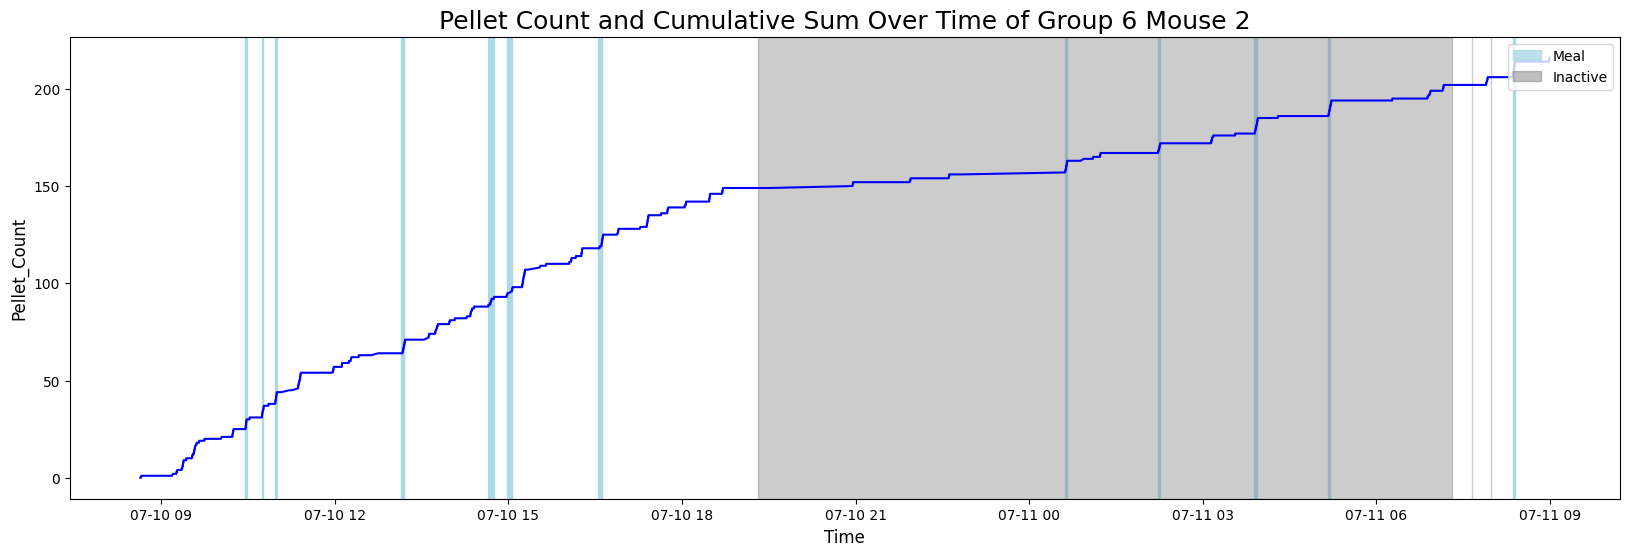

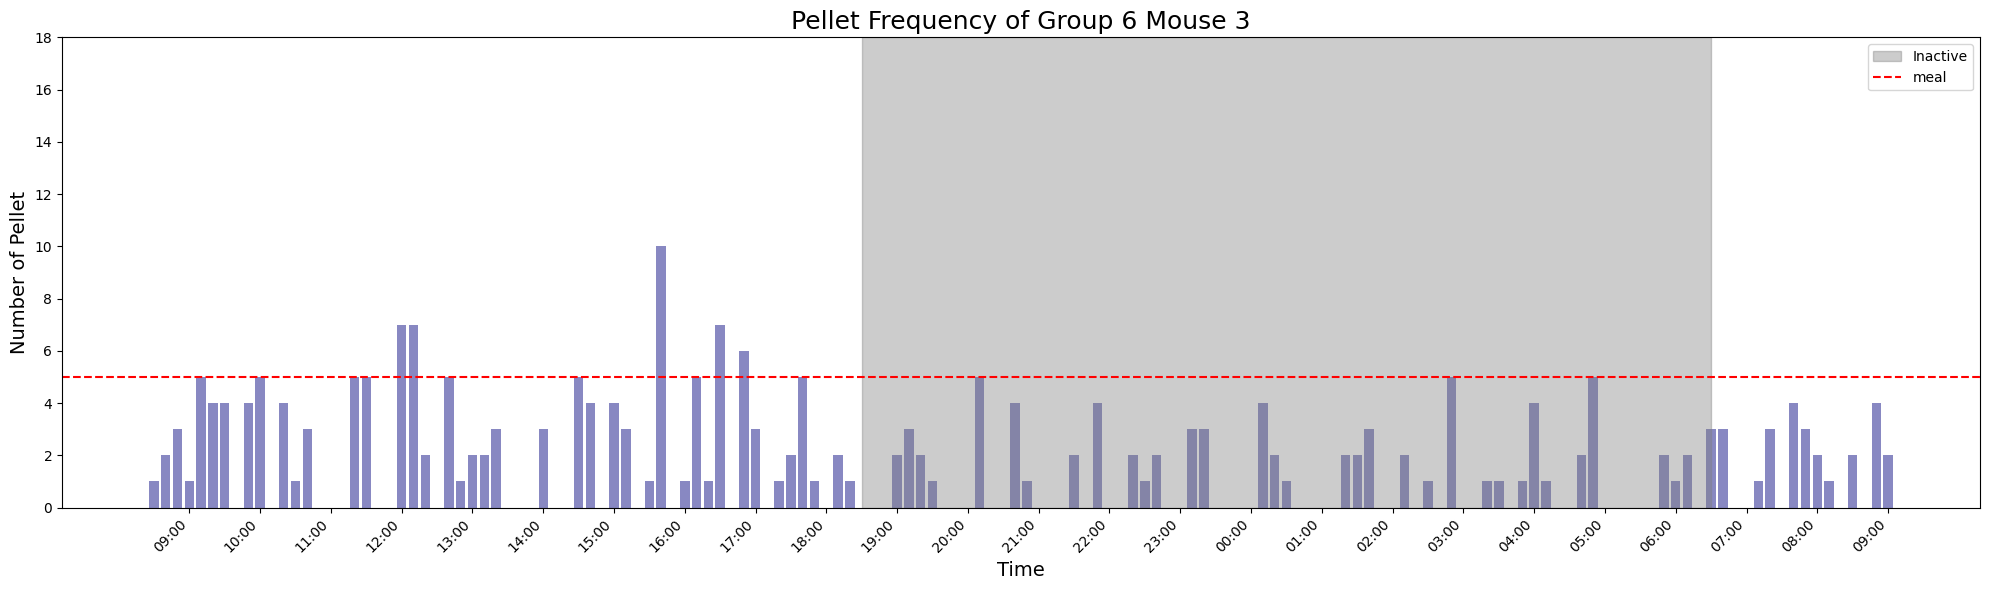

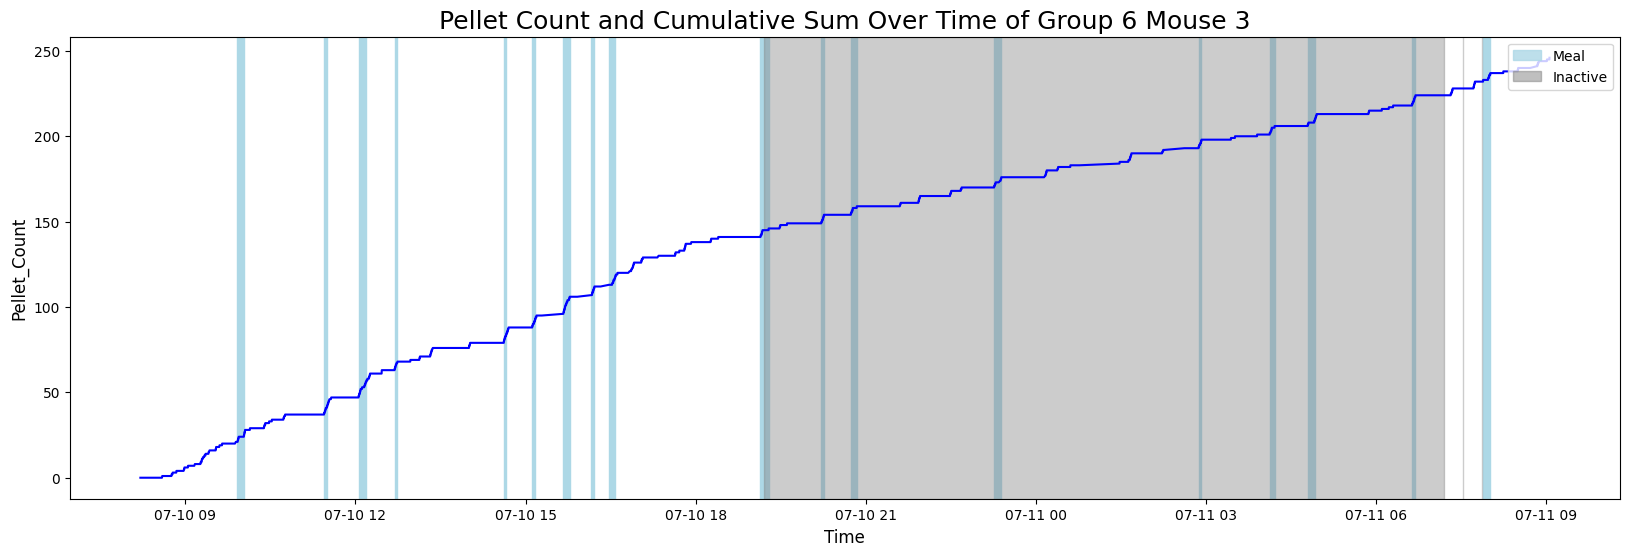

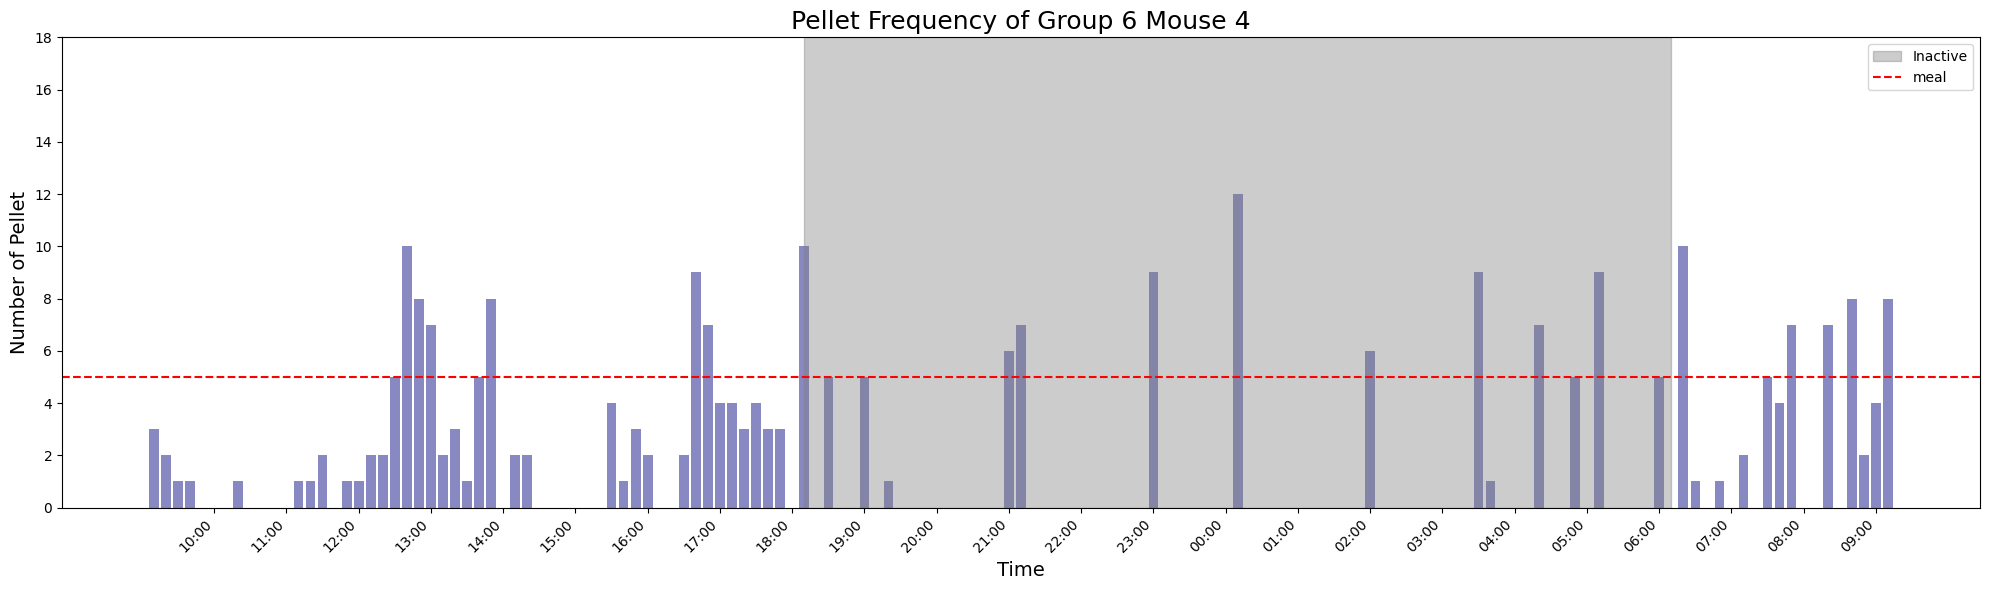

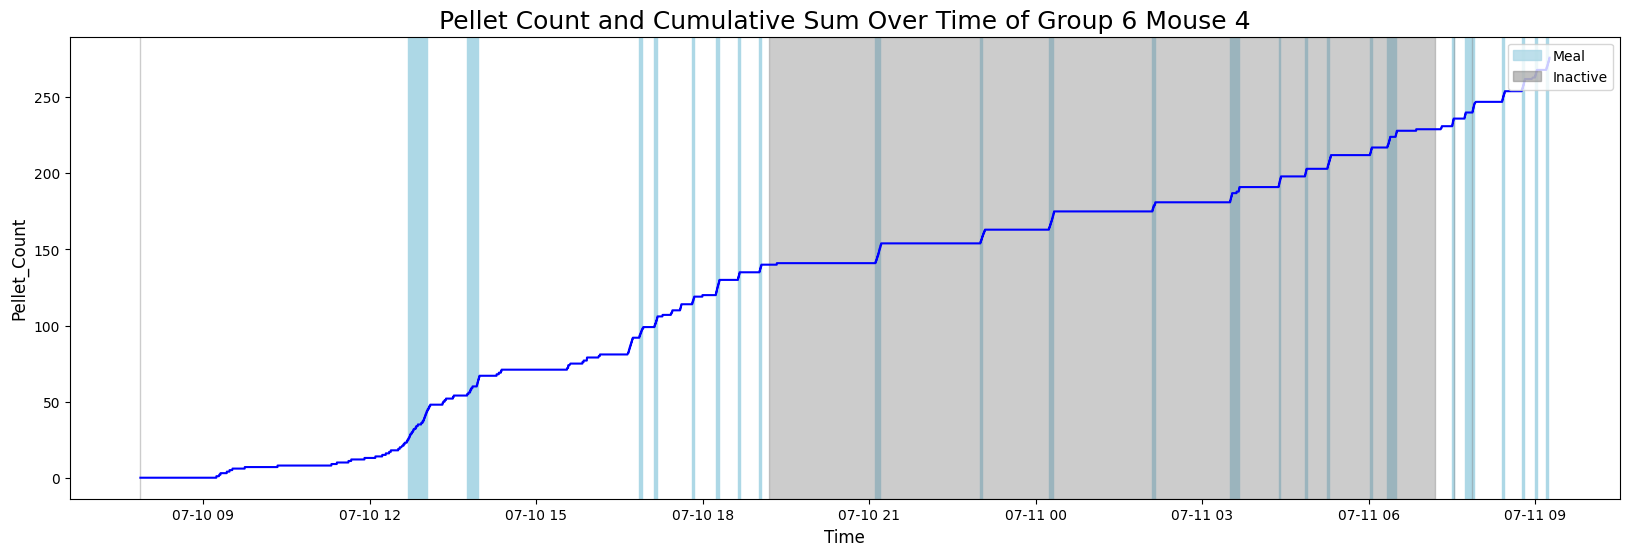

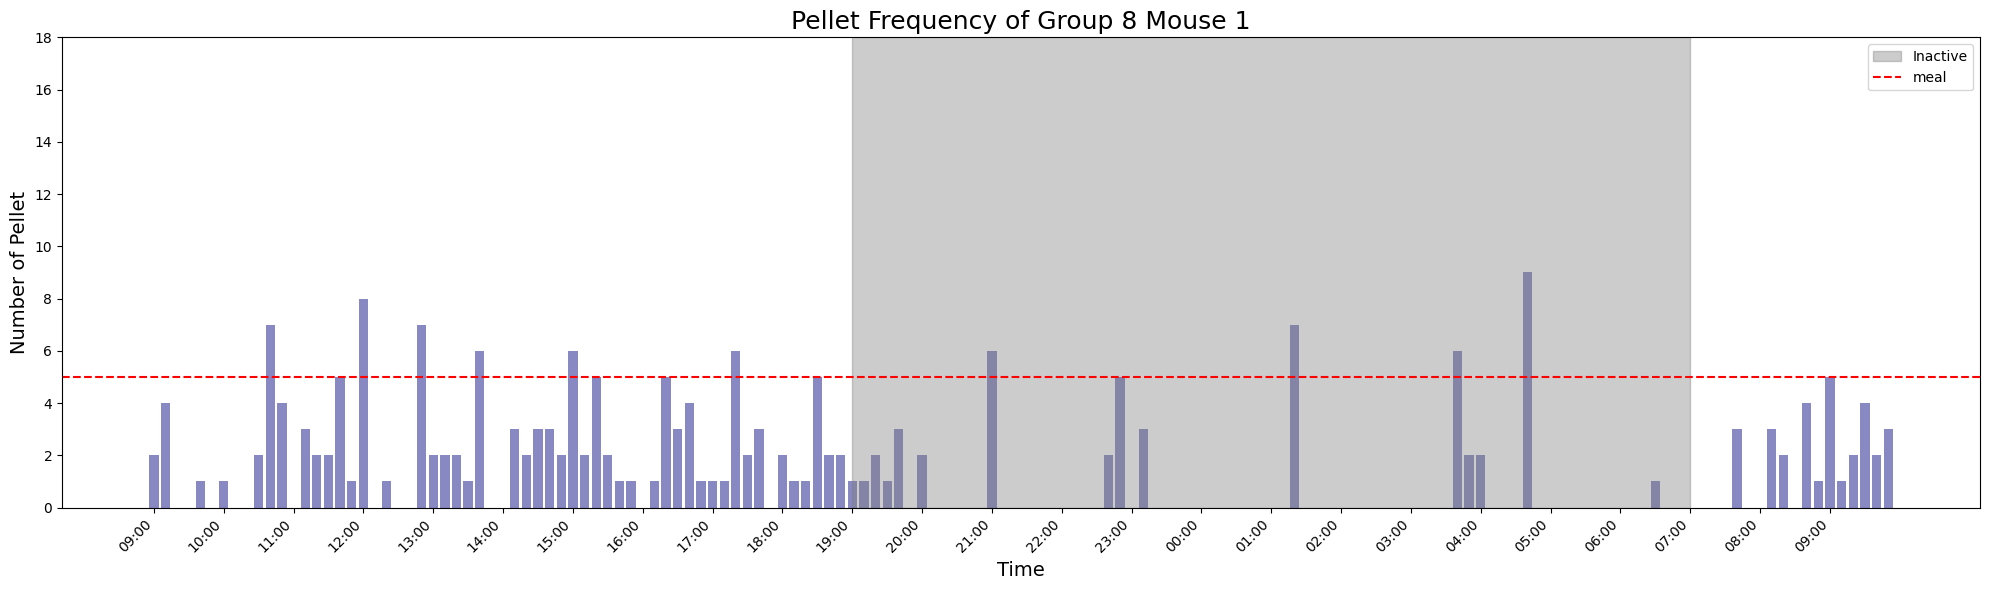

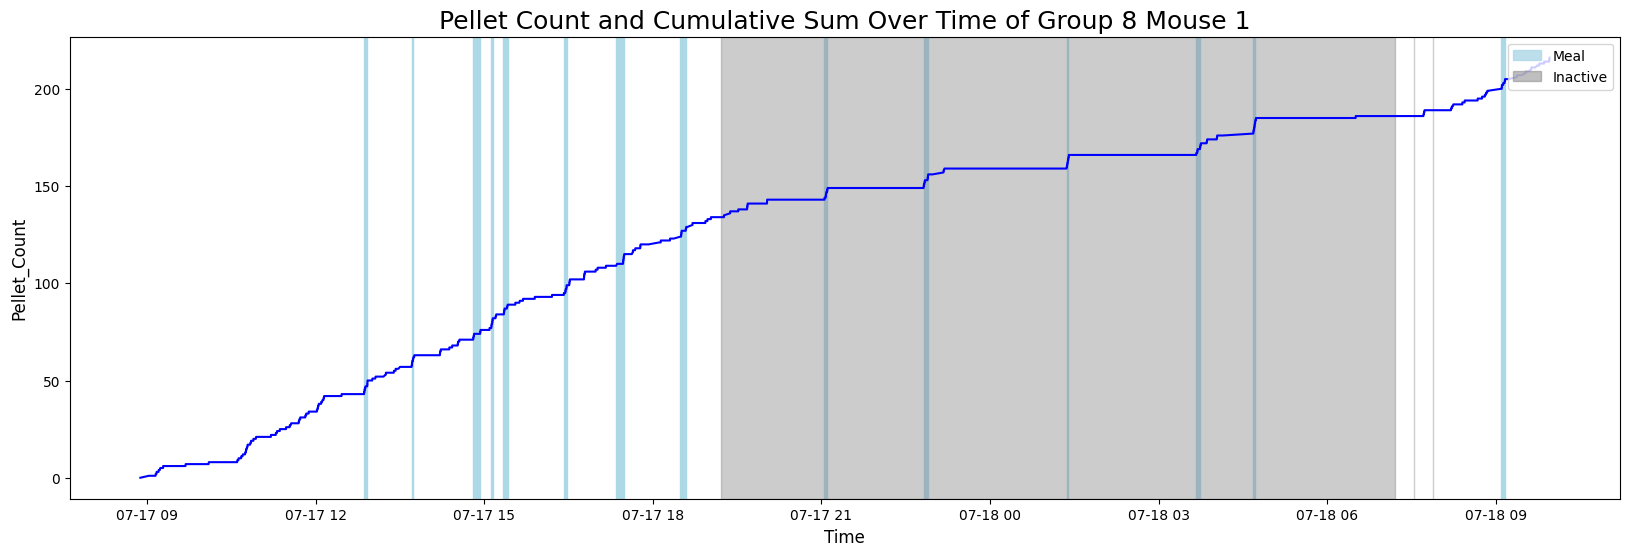

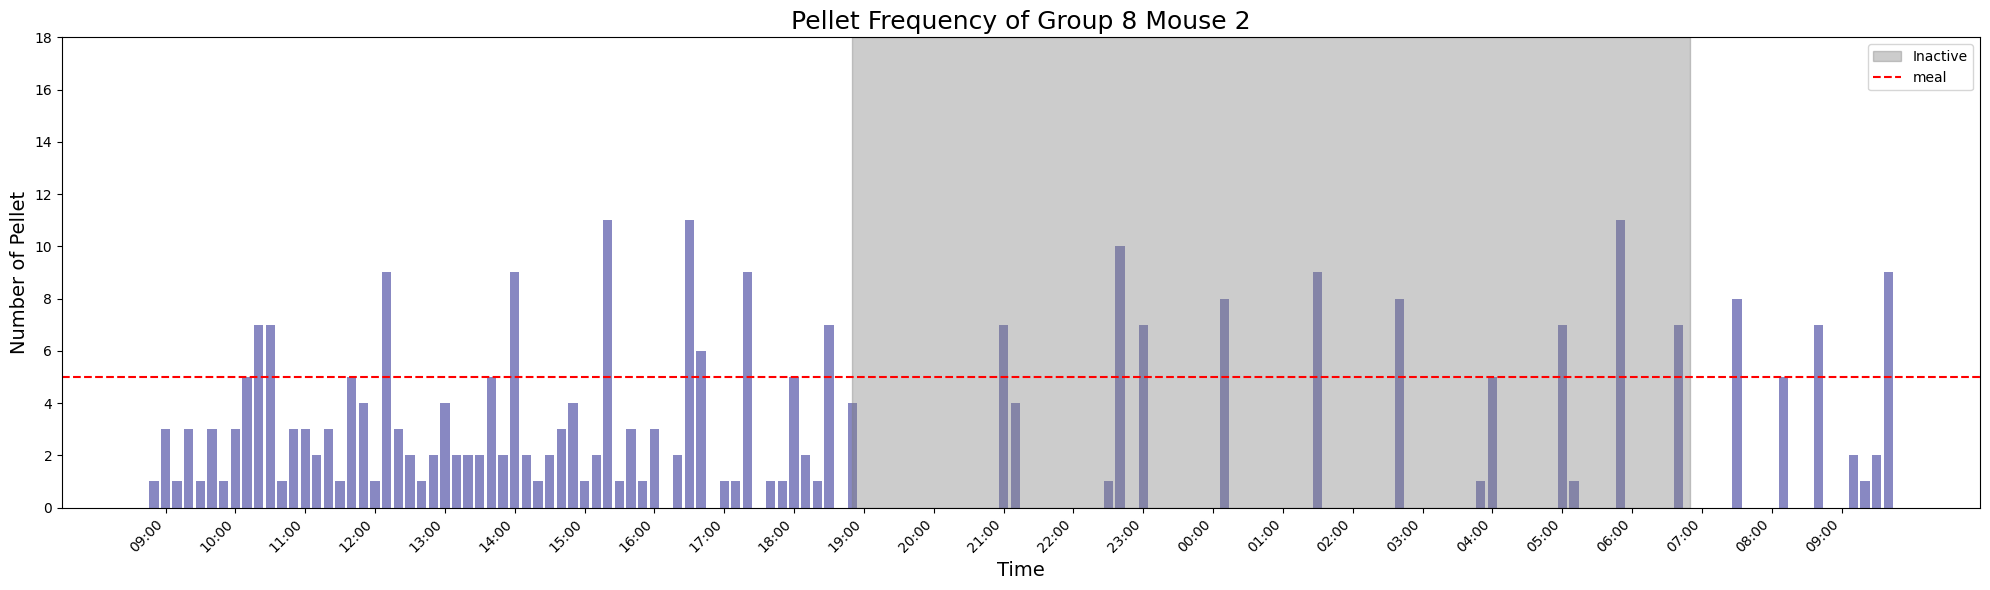

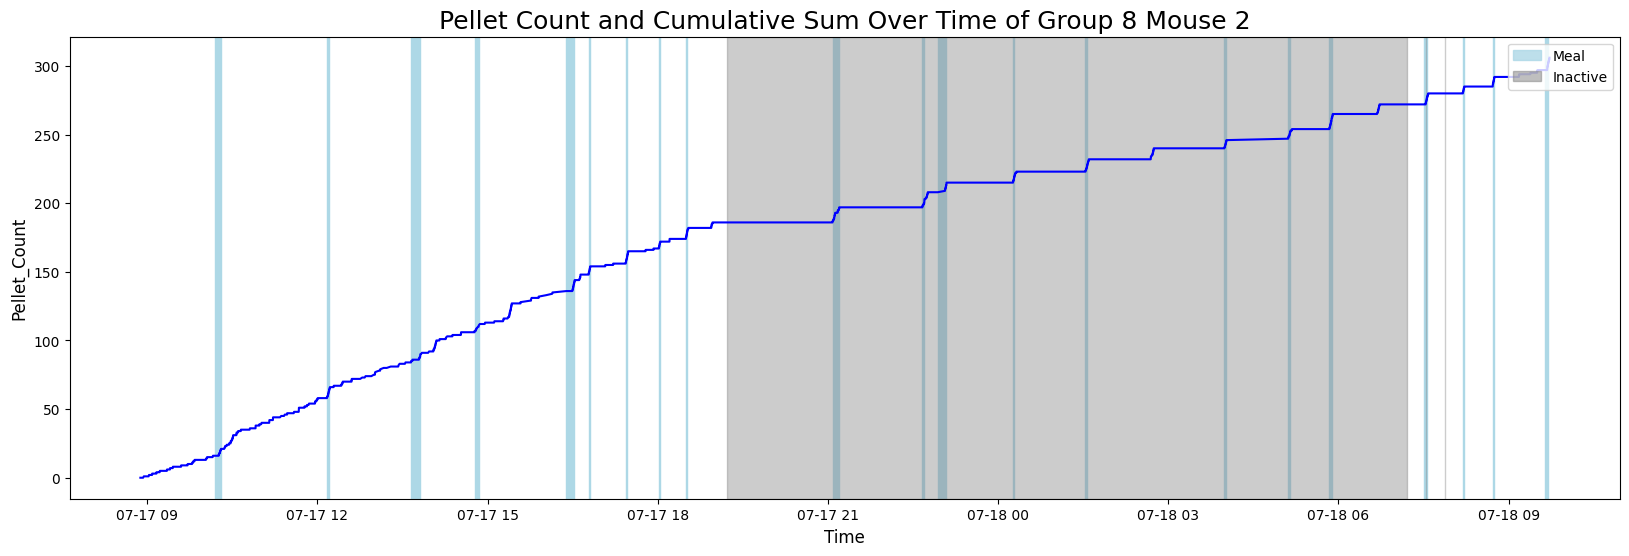

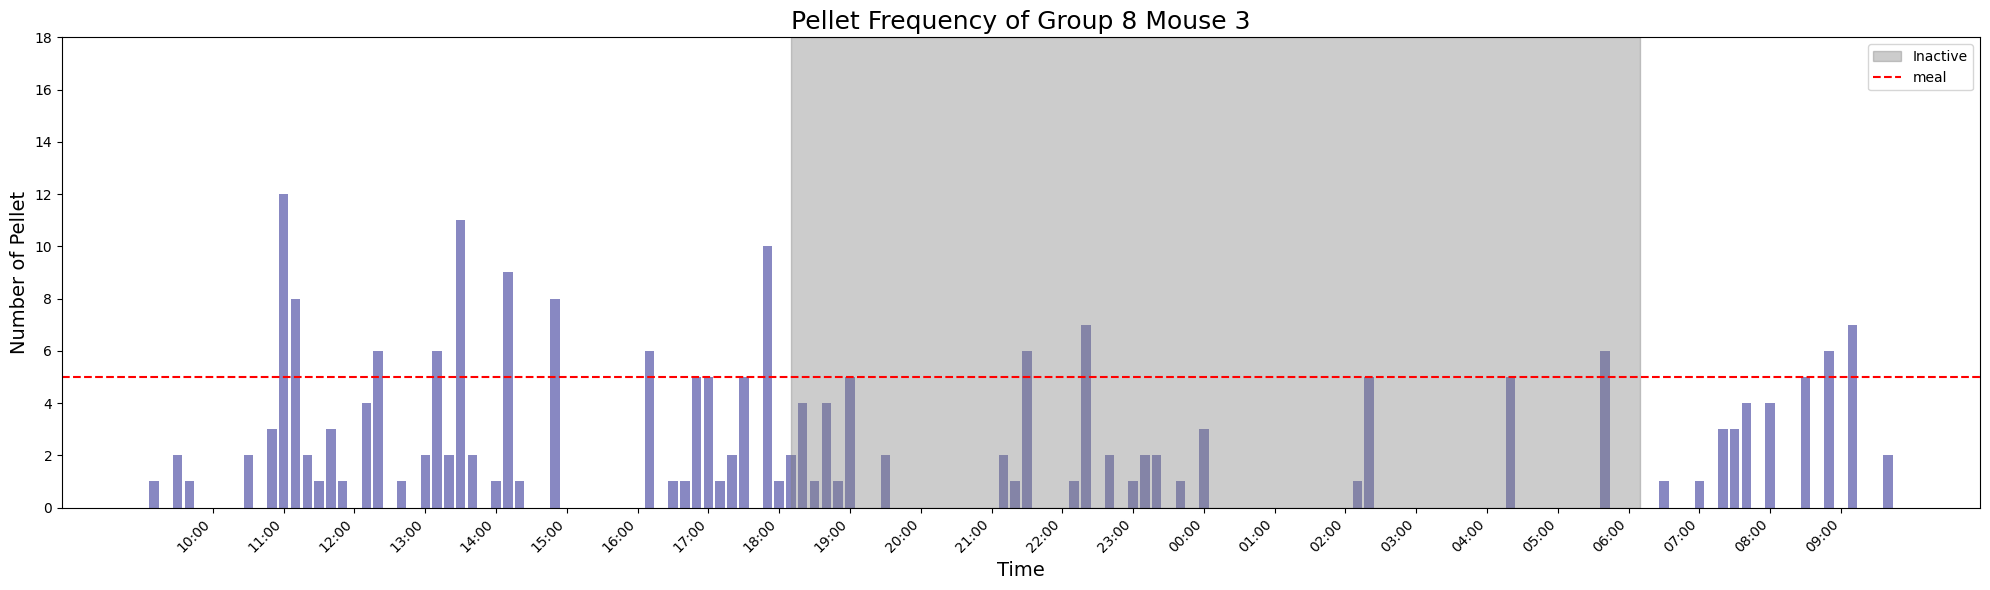

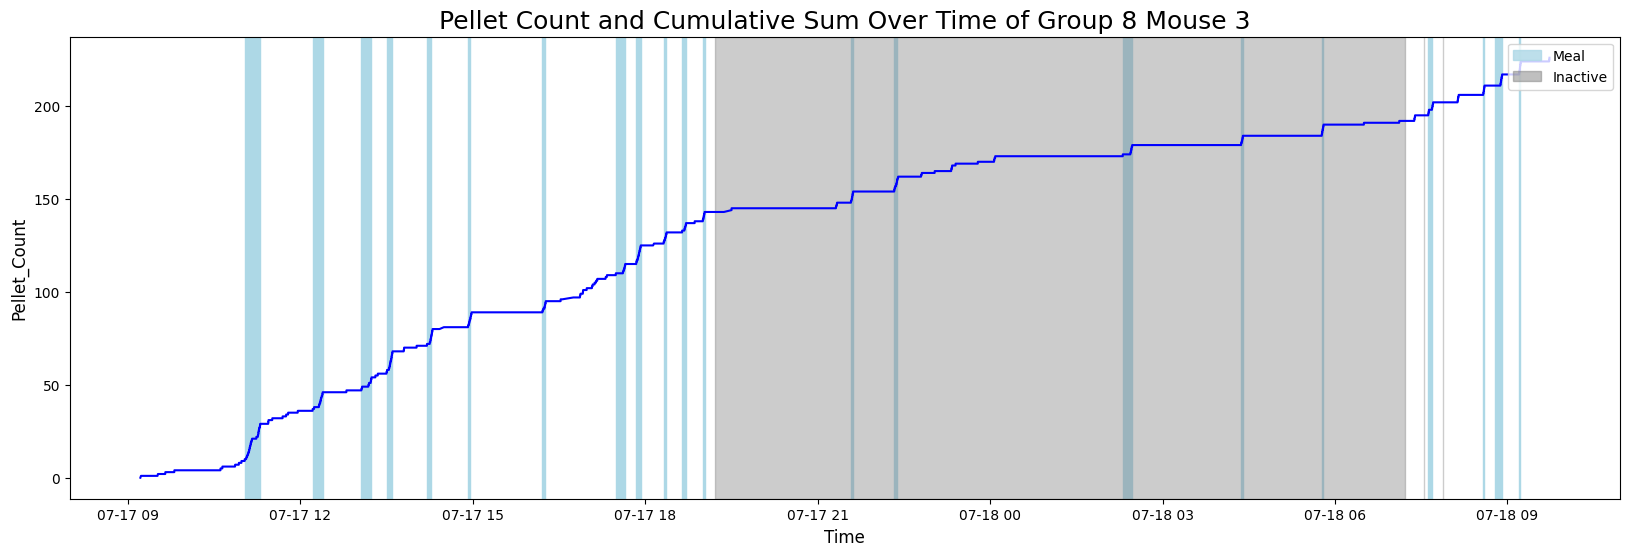

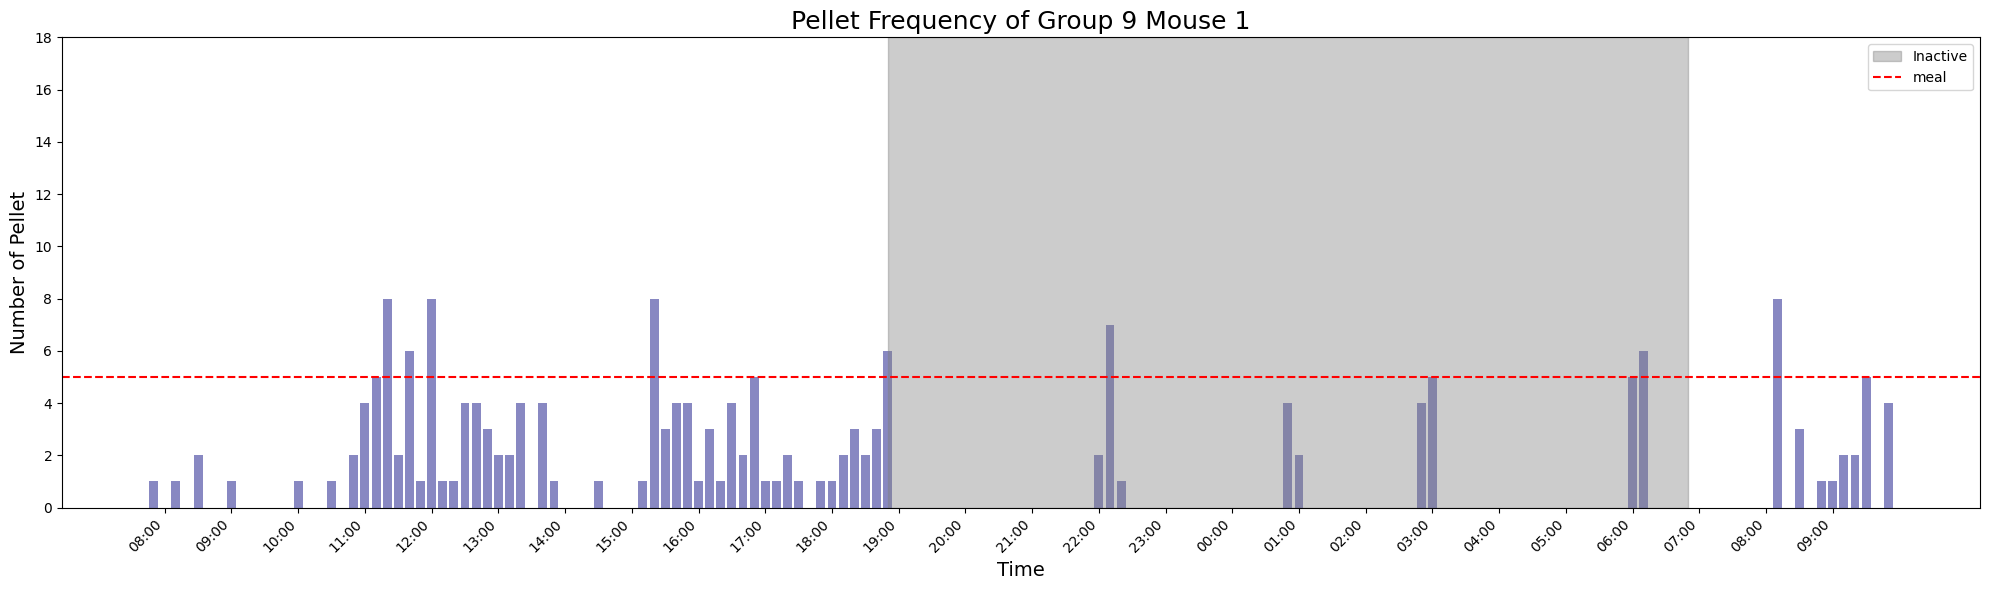

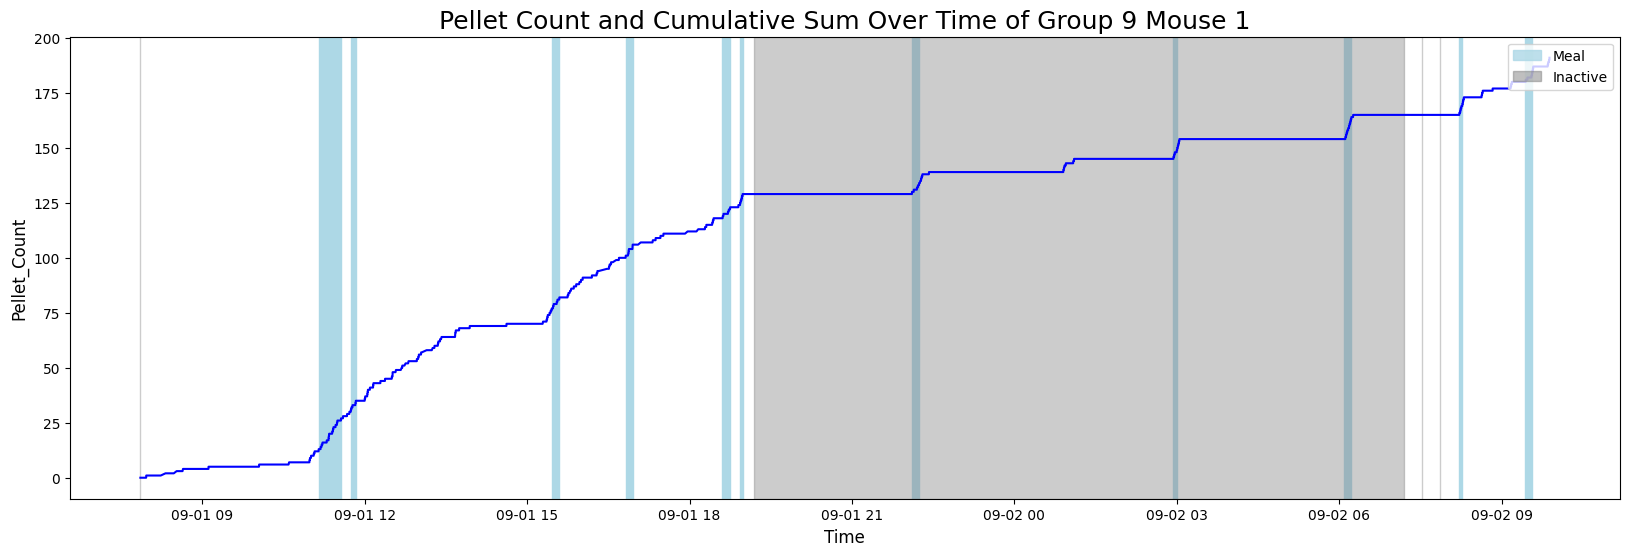

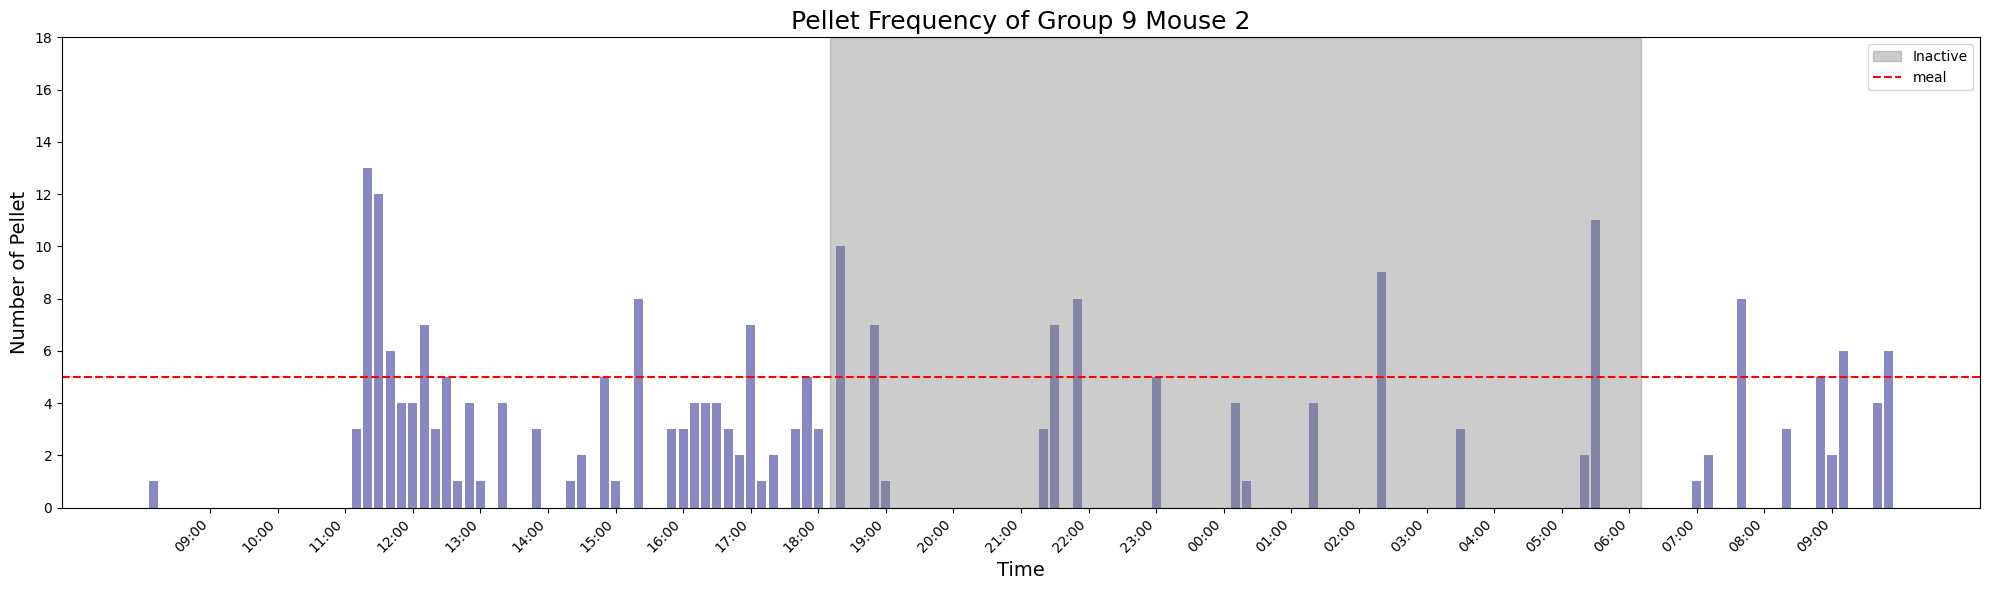

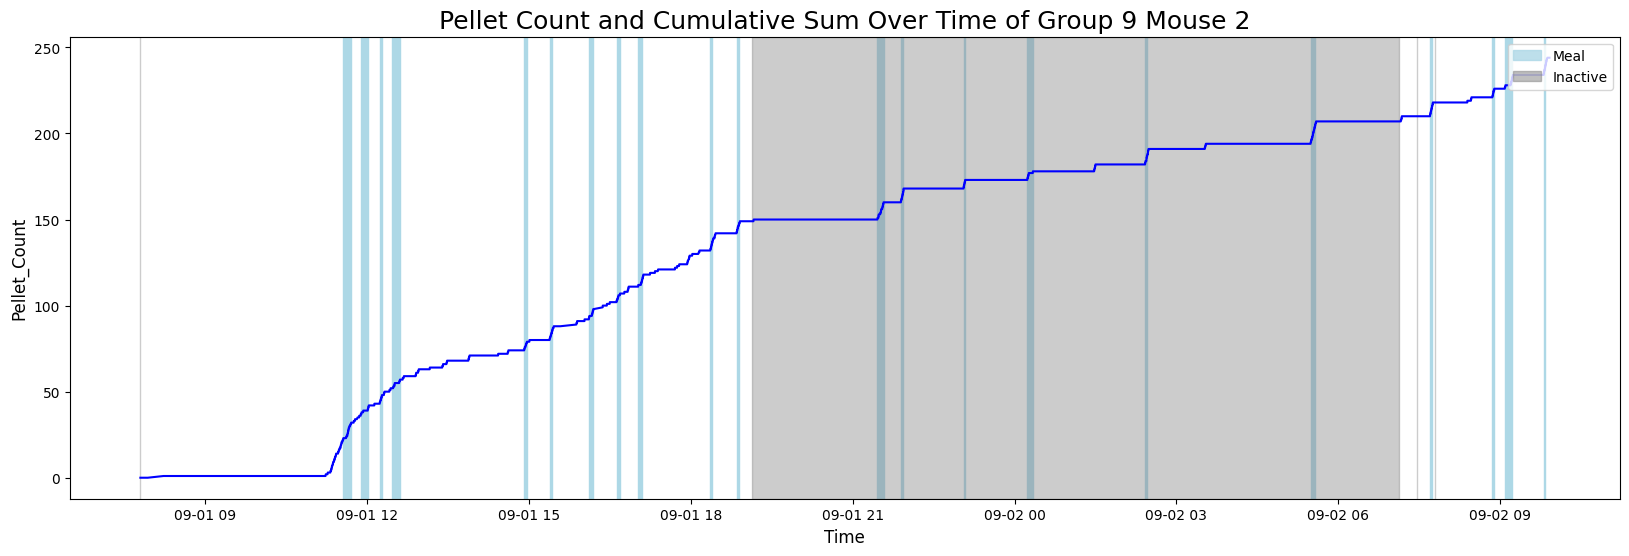

In [5]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
cask_fir_meal = []
flip_cask_meal_count = []

for path in paths.fr1_cask_csvs:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    meal = ml.find_meals(data)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    cask_fir_meal.append(meal_1)
    flip_cask_meal_count.append(avg)
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

In [7]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [8]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  0.07950119597833202
There is no significant difference between the two groups.


In [9]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  2.320317523755245e-11
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [10]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='greater')

P Value is  0.24497089434924002
There is no significant difference between the two groups.


#### Inactive and active meal between group

In [11]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.11478657530733441
There is no significant difference between the two groups.


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Average Pellet

Control Size: 4
CASK Size: 14
Control Average: 9.66825
CASK Average: 10.487071428571427
Control Standard Deviation: 0.38454247706419414
CASK Standard Deviation: 2.067110226091774


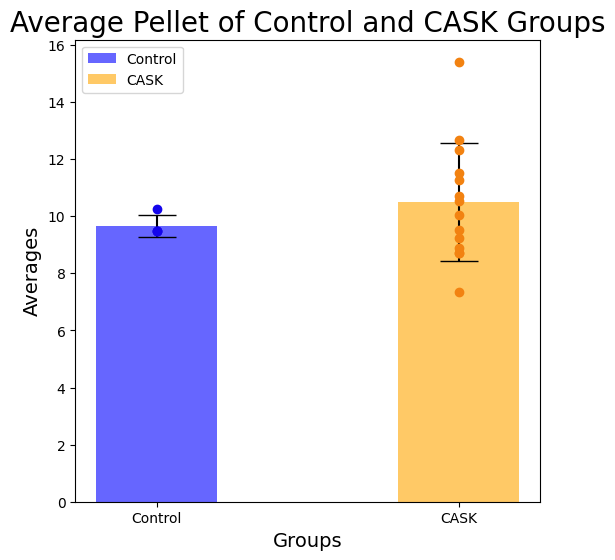

In [12]:
ml.graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', exp_name='CASK')

In [13]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='greater')

P Value is  0.2256698003811176
There is no significant difference between the two groups.


#### Time needed to start the first meal

Control Size: 4
CASK Size: 14
Control Average: 189.6625
CASK Average: 145.67619047619047
Control Standard Deviation: 27.381432526846048
CASK Standard Deviation: 69.27099382916768


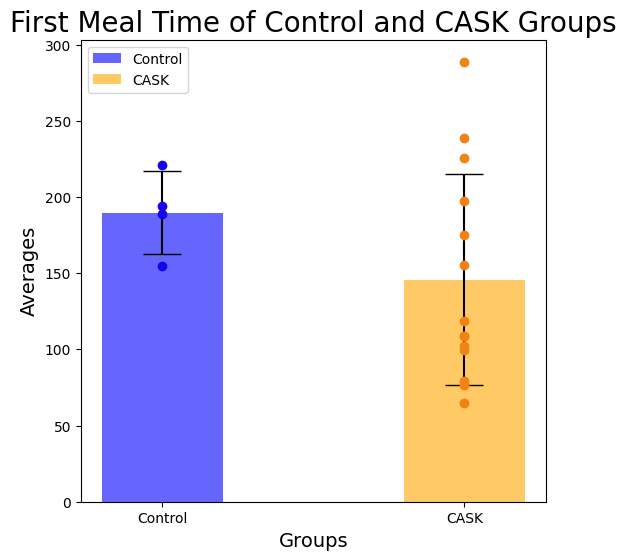

In [14]:
ml.graph_group_stats(ctrl_fir_meal, cask_fir_meal, stats_name='First Meal Time',exp_name='CASK')

In [15]:
invs.perform_T_test(ctrl_fir_meal, cask_fir_meal, test_side='less')

P Value is  0.11993644925659153
There is no significant difference between the two groups.
